# Data Methods for Health Research

## National Healthcare Service (NHS) review

Despite improvements in the NHS, the public healthcare system has been facing unrelenting pressure over the past years. Thus, a better understanding of its costs is a pressing need, so that potential areas for improvement can be identified and available resources can be allocated more efficiently. Herein, we have carried out a review which aims to document and assess GP prescribing costs for the NHS England in April 2018. The data used for this review comes from two different .csv files. The first file captures the number of patients registered at a GP practice (https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data/april-2018) and the second file the practice level prescription (https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data/april-2018), both from April 2018.

In [1]:
import numpy as np  # We import numpy and abbreviate as np
import pandas as pd # We import pandas and abbreviate as pd
import matplotlib.pyplot as plt # We import matplotlib and abbreviate as plt
from scipy import stats # We import stats from scipy to work with statistical packages 

# We ensure our plots open in the notebook
%matplotlib inline

First, an exploratory data analysis of the file containing the number of patients registered at a GP practice in April 2018 has been performed.

In [2]:
df1=pd.read_csv('https://files.digital.nhs.uk/71/B59D99/gp-reg-pat-prac-all.csv')

In [3]:
# Number of rows and columns
df1.shape

(7241, 10)

In [4]:
# Exploration of the first rows of the DataFrame
df1.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [5]:
# No missing values present in any of the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 10 columns):
PUBLICATION           7241 non-null object
EXTRACT_DATE          7241 non-null object
TYPE                  7241 non-null object
CCG_CODE              7241 non-null object
ONS_CCG_CODE          7241 non-null object
CODE                  7241 non-null object
POSTCODE              7241 non-null object
SEX                   7241 non-null object
AGE                   7241 non-null object
NUMBER_OF_PATIENTS    7241 non-null int64
dtypes: int64(1), object(9)
memory usage: 565.8+ KB


In [6]:
# Summary statistics
df1.describe()

,NUMBER_OF_PATIENTS
count,7241.000000
mean,8153.514017
std,5184.888435
min,1.000000
25%,4501.000000
50%,7235.000000
75%,10711.000000
max,72227.000000


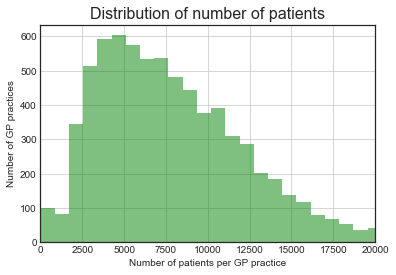

Kurtosis is 13.59. The distribution has a positive kurtosis.
Skewness is 2.27. The distribution is positively skewed.


In [7]:
# Plot of histogram
plt.style.use('seaborn-white')
bins=int(np.sqrt(len(df1['NUMBER_OF_PATIENTS'])))

plt.hist(df1['NUMBER_OF_PATIENTS'], bins=bins, alpha=0.5, histtype='stepfilled', color='green')
plt.xlabel('Number of patients per GP practice')
plt.xlim(-10,20000)
plt.ylabel('Number of GP practices')
plt.title('Distribution of number of patients', fontsize=16)
plt.grid()
plt.show()

# Analysing skewness and kurtosis can also provide us useful information about our data with regards to symmetry and tailing, respectively 
from scipy.stats import kurtosis
from scipy.stats import skew

k=round(kurtosis(df1['NUMBER_OF_PATIENTS']),2)
print('Kurtosis is {}. The distribution has a positive kurtosis.'.format(k))
s=round(skew(df1['NUMBER_OF_PATIENTS']),2)
print('Skewness is {}. The distribution is positively skewed.'.format(s))

Now, an exploratory analysis of the file containing the practice prescription level has been carried out.

In [8]:
df2=pd.read_csv('Prescribing.csv') # https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV

In [9]:
df2.shape

(9748354, 11)

In [10]:
df2.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [11]:
df2.info(verbose=True, null_counts=True) # for large datasets, it is needed to display full summary statistics and null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9748354 entries, 0 to 9748353
Data columns (total 11 columns):
 SHA                                            9748354 non-null object
PCT                                             9748354 non-null object
PRACTICE                                        9748354 non-null object
BNF CODE                                        9748354 non-null object
BNF NAME                                        9748354 non-null object
ITEMS                                           9748354 non-null int64
NIC                                             9748354 non-null float64
ACT COST                                        9748354 non-null float64
QUANTITY                                        9748354 non-null int64
PERIOD                                          9748354 non-null int64
                                                9748354 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 818.1+ MB


In order to make the information present in the prescribing dataset more understandable to the reader, column indexes with acronyms have been renamed with the full description and columns which are not relevant for the analysis have been dropped, too.

In [12]:
df2=df2.rename(columns={df2.columns[3]:'BNF_CODE', df2.columns[4]:'BNF_NAME', 
                        df2.columns[5]: df2.columns[5].rstrip(),df2.columns[6]:'NET_INGREDIENT_COST', 
                        df2.columns[7]:'ACTUAL_COST'})
df2=df2.drop(columns=[df2.columns[0],df2.columns[1],df2.columns[9]])
df2.head()

,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NET_INGREDIENT_COST,ACTUAL_COST,QUANTITY,
0,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,
1,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,
2,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,
3,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,
4,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,


In [13]:
df2.describe(include='all')

,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NET_INGREDIENT_COST,ACTUAL_COST,QUANTITY,
count,9748354,9748354,9748354,9.748354e+06,9.748354e+06,9.748354e+06,9.748354e+06,9748354
unique,9578,22358,19227,NaN,NaN,NaN,NaN,1
top,M85063,0603020T0AAACAC,GlucoRX FinePoint Needles Pen Inj Screw,NaN,NaN,NaN,NaN,
freq,4003,7964,16287,NaN,NaN,NaN,NaN,9748354
mean,NaN,NaN,NaN,9.115409e+00,7.078242e+01,6.597908e+01,7.135560e+02,NaN
std,NaN,NaN,NaN,2.999382e+01,1.918400e+02,1.782526e+02,4.124964e+03,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,1.000000e+00,7.920000e+00,7.460000e+00,2.800000e+01,NaN
50%,NaN,NaN,NaN,2.000000e+00,2.250000e+01,2.112000e+01,9.000000e+01,NaN
75%,NaN,NaN,NaN,6.000000e+00,6.286000e+01,5.868000e+01,3.360000e+02,NaN


Once a preliminar exploratory analysis has been done, we have delved into two specific locations in the UK: Cambridge and London. 

For each of these cities, the total number of practices, patients registered, prescriptions, actual cost of these prescriptions and the top 10 and bottom 10 drugs prescribed will be reported. Since the same operations had to be performed twice, functions have been defined, so that they can be called when appropriate and the code is kept as concise as possible.

First, the practices in London and Cambridge have to be collated from the dataset.

The Organisation Data Service at NHS Digital is responsible for the publication of the definitive list of organisation codes and names across the NHS. Thus, it assigns the clinical commissioning groups (CCGs) authorisations. 
In London, the CCG codes of the healthcare services range from '07L' to '09A'. Consequently, all the practices labelled with these codes are located in London. 

The CCG code for Cambridge would be 06H. However, this CCG code covers the NHS in Cambridgeshire and Peterborough and this would not be specific enough. Thus, we have used the postcode as an identifier instead. The postcodes for the city of Cambridge range from CB1 to CB5 according to https://data.gov.uk/dataset/9bd39552-5b5c-4a87-9fdc-fb2b0142b3c8/cambridgeshire-postcodes.

In [14]:
# We define a function to identify the practices in each city
def practice(city): 
    # Regular expressions to identify city-specific GP practices
    if city=='London':
        city_practice=df1[df1.CCG_CODE.str.match('07[L-Z]|08[A-Y]|09A')]
    if city=='Cambridge':
        city_practice=df1[df1.POSTCODE.str.match('CB[1-5]')]
    
    list_city_practice=city_practice.CODE.tolist()
        
    return list_city_practice, city_practice

After having identified the practices located in the city of interest, the rest of the parameters can be determined.

In [15]:
def no_patients(city):
    no_patients_tot=np.sum(df1['NUMBER_OF_PATIENTS'])
    no_patients_city=np.sum(practice(city)[1].NUMBER_OF_PATIENTS) # Sum number of patients of GP in the specified city 
    ratio_patients=np.round(np.divide(no_patients_city,no_patients_tot)*100,2) # Calculation of %
    return no_patients_city, ratio_patients

In [16]:
def no_prescriptions(city):
    no_prescriptions_tot=np.sum(df2['ITEMS'])
    no_prescriptions_city=np.sum(df2[df2['PRACTICE'].isin(practice(city)[0])].ITEMS) # Sum number of prescriptions in the specified city
    ratio_prescriptions_city=np.round(np.divide(no_prescriptions_city,no_prescriptions_tot)*100,2)
    return no_prescriptions_city, ratio_prescriptions_city

In [17]:
def total_cost(city):
    total_cost_global=np.sum(df2['ACTUAL_COST'])
    total_cost_city=np.round(np.sum(df2[df2['PRACTICE'].isin(practice(city)[0])].ACTUAL_COST),2) # Sum actual cost in the specified city
    ratio_cost_city=np.round(np.divide(total_cost_city,total_cost_global)*100,2)
    return total_cost_city, ratio_cost_city

In [18]:
def freq_city(city): 
    #We first define a function which cleans the DataFrame from irrelevant columns and resets indexing      
    df2_city_freq=df2[df2['PRACTICE'].isin(practice(city)[0])][['BNF_NAME','BNF_CODE','ITEMS']]
    freq1_city=df2_city_freq.reset_index(0, drop=True)
    return freq1_city 

In [19]:
def top10_drugs(city):
    # freq_city function is called
    freq1_city=freq_city(city)
    
    # Frequencies grouped by the first 9 characters of the BNF CODE (describe the chemical substance)
    freq2_city=freq1_city.groupby(lambda e: freq1_city.iloc[e, 1][:9]).agg({'BNF_NAME': lambda x: x.iloc[0],'BNF_CODE': lambda x: x.iloc[0],'ITEMS':'sum'}).sort_values(by='ITEMS',ascending=False)
    
    # Since we grouped by chemical substances, strength or formulation of the drug might differ
    # Irrelevant information often comes after the '_' following the drug name
    freq2_city['BNF_NAME']=freq2_city.apply(lambda z: z['BNF_NAME'].split()[0].split('_')[0], axis=1)
    return freq2_city

In order to determine the bottom 10 less frequent prescribed drugs, we had to consider the fact that several drugs could be prescribed with low frequencies. Therefore, we have devised a method by which we report all of the drugs prescribed with frequencies ranging from 1 to 10. Of note, some of the names of the drugs prescribed with lower frequency might not be informative enough (especially if we take the first word of the string of the drug). However, having the BNF CODE available, the actual drug could be easily tracked in the British National Formulary (BNF).

In [20]:
def bottom10_drugs(city):
    # Top10 drugs are reversed, so that we start from bottom 10
    freq3_city=top10_drugs(city).sort_values(by='ITEMS',ascending=True).reset_index(0, drop=True)
    
    # keys for dictionaries are in a list
    keys=list(np.arange(1,11))
    
    # Index of the last drug being prescribed 10 times is located
    index=freq3_city[freq3_city['ITEMS']==10].index[-1]
    
    # Loop-filled dictionaries are created
    freq_dict1={} # This dictionary will contain BNF_NAME 
    freq_dict2={} # This dictionary will contain BNF_CODE
    
    j=0 # We set counter j at 0, so that we start with the first value from the list 'keys'
    # We start a loop ranging from 0 to 'index'
    for i in range(0,index+1): 
        if keys[j] not in freq_dict1: #Only unique drugs will be added
            freq_dict1[keys[j]]=list()
            freq_dict2[keys[j]]=list()
        # Prescription frequency has to match the corresponding key in 'keys'
        if freq3_city.iloc[i,2]==keys[j]:
            freq_dict1[keys[j]].append(freq3_city.iloc[i,0]) #Adding the BNF_NAME
            freq_dict2[keys[j]].append(freq3_city.iloc[i,1].rstrip()) #Adding the BNF_CODE
        else:
            j=j+1 # When the key has been filled with all the drugs with that frequency, move on to the next key
    
    # Conversion of dictionaries into DataFrames
    freq_dict1=pd.DataFrame.from_dict(freq_dict1, orient='index').transpose().fillna('')
    freq_dict2=pd.DataFrame.from_dict(freq_dict2, orient='index').transpose().fillna('')
    
    # Concatenation of DataFrames
    bttm10_city=pd.concat([freq_dict1,freq_dict2], axis=1)
    # Defining column names for the concatenated DataFrame
    bttm10_city=bttm10_city[list(set(sum(zip(freq_dict1.columns, freq_dict2.columns),())))]
    iterables=[[str(i) for i in range(1,11)],['BNF_NAME','BNF_CODE']]
    bttm10_city.columns=pd.MultiIndex.from_product(iterables).rename('prescription frequency \n (items)', level=0) #DataFrame containing both dictionaries
    return bttm10_city

For further descriptive statistical analysis, it might also be relevant to display the number of registered patients, prescriptions and total costs detailed by practice.

In [21]:
def no_patients_city_bypractice(city):
    no_patients_city_bypractice=pd.DataFrame(practice(city)[1][['CODE','NUMBER_OF_PATIENTS']])
    return no_patients_city_bypractice

In [22]:
def no_presc_cost_city(city):
    # Define a function which captures both number of prescriptions and total cost by practice
    no_presc_cost_city=df2[df2['PRACTICE'].isin(practice(city)[0])].groupby('PRACTICE',
                                                                        as_index=False)[['ITEMS','ACTUAL_COST']].sum()
    return no_presc_cost_city

Once all the functions have been defined, we have proceeded with the analysis of the London GP practices.

In [23]:
# Identification of all GP practices located in London
list_ldn_practice=practice('London')[0]
print('There are {} registered GP practices in London in April 2018.\nThe codes of the GP practices in London are the following: \n{}.'.format(len(list_ldn_practice),list_ldn_practice))

There are 1323 registered GP practices in London in April 2018.
The codes of the GP practices in London are the following: 
['F82001', 'F82003', 'F82005', 'F82012', 'F82015', 'F82017', 'F82018', 'F82025', 'F82027', 'F82034', 'F82038', 'F82040', 'F82042', 'F82051', 'F82604', 'F82612', 'F82621', 'F82625', 'F82634', 'F82642', 'F82647', 'F82650', 'F82660', 'F82661', 'F82668', 'F82676', 'F82677', 'F82678', 'F82679', 'F82680', 'F86040', 'Y01280', 'Y01719', 'Y01795', 'Y02575', 'Y02583', 'Y04786', 'E83003', 'E83005', 'E83006', 'E83007', 'E83008', 'E83009', 'E83010', 'E83011', 'E83012', 'E83013', 'E83016', 'E83017', 'E83018', 'E83020', 'E83021', 'E83024', 'E83025', 'E83026', 'E83027', 'E83028', 'E83030', 'E83031', 'E83032', 'E83034', 'E83035', 'E83036', 'E83037', 'E83038', 'E83039', 'E83041', 'E83044', 'E83045', 'E83046', 'E83049', 'E83050', 'E83053', 'E83600', 'E83613', 'E83621', 'E83622', 'E83624', 'E83629', 'E83631', 'E83632', 'E83633', 'E83637', 'E83638', 'E83639', 'E83644', 'E83649', 'E836

In [24]:
# Total number of registered patients
no_patients_ldn=no_patients('London')
print('The number of patients registered in London GP practices in April 2018 is {}, which is {}% of the total.'.format(no_patients_ldn[0],no_patients_ldn[1]))

# Total number of prescriptions
no_prescriptions_ldn=no_prescriptions('London')
print('The number of prescriptions issued by London GP practices in April 2018 is {}, which is {}% of the total.'.format(no_prescriptions_ldn[0],no_prescriptions_ldn[1]))

# Total actual cost of the prescriptions
total_cost_ldn=total_cost('London')
print('The total actual cost of the prescriptions issued by London GP practices in April 2018 is {} £, which is {}% \nof the total.'.format(total_cost_ldn[0],total_cost_ldn[1]))

print('The data is captured in the following table:')
d_ldn={'number of practices':len(list_ldn_practice),'number of patients':no_patients_ldn[0],'number of prescriptions':no_prescriptions_ldn[0],'total actual cost':total_cost_ldn[0]}
i_ldn=['London']
df_ldn=pd.DataFrame(data=d_ldn, index=i_ldn).T
df_ldn

The number of patients registered in London GP practices in April 2018 is 9851208, which is 16.69% of the total.
The number of prescriptions issued by London GP practices in April 2018 is 10416926, which is 11.72% of the total.
The total actual cost of the prescriptions issued by London GP practices in April 2018 is 76586738.71 £, which is 11.91% 
of the total.
The data is captured in the following table:


,London
number of practices,1323.00
number of patients,9851208.00
number of prescriptions,10416926.00
total actual cost,76586738.71


In [25]:
# Top 10 most frequent drugs prescribed in London GP practices
freq2_ldn=top10_drugs('London')
top10_ldn=pd.DataFrame(freq2_ldn.head(10).reset_index(0, drop=True))
top10_ldn['%']=(top10_ldn['ITEMS']/top10_ldn['ITEMS'].sum())*100
top10_ldn

,BNF_NAME,BNF_CODE,ITEMS,%
0,Atorvastatin,0212000B0AAAAAA,449846,15.486059
1,Amlodipine,0206020A0AAAAAA,354663,12.209361
2,Metformin,0601022B0AAABAB,295603,10.176206
3,Colecal,0906040G0AAANAN,294817,10.149147
4,Levothyrox,0602010V0AABWBW,285559,9.830438
5,Ramipril,0205051R0AAAAAA,274274,9.441950
6,Omeprazole,0103050P0AAAAAA,269995,9.294644
7,Aspirin,0209000A0AAABAB,235565,8.109383
8,Lansoprazole,0103050L0AAAAAA,223527,7.694972
9,Simvastatin,0212000Y0AAAAAA,220996,7.607841


In [26]:
bottom10_ldn=bottom10_drugs('London')
bottom10_ldn

prescription frequency 
 (items)                                  1  \
                                                           BNF_NAME   
0                                                              SASH   
1                                                            Frador   
2                                                         Coloplast   
3                                                     Hyaluronidase   
4                                                     Benzbromarone   
5                                                        Triamcinol   
6                                                              Ward   
7                                                           Pelican   
8                                             Timolol/Bendroflumeth   
9                                                           Repatha   
10                                                             Jade   
11                                                          M.Sauer   
12                                                     Erythromycin   
13                                                          Tixylix   
14                                                       Cefotaxime   
15                                                         Clomethi   
16                                                        Trientine   
17                                                              Sod   
18                                                          U-drain   
19                                                       Cefuroxime   
20                                                     Mercaptamine   
21                                                          Dolenio   
22                                                        Buttercup   
23                                                     Tocofersolan   
24                                                          B.Braun   
25                                                        Meropenem   
26                                                             Ward   
27                                                              Sod   
28                                                        HealthAid   
29                                                     Betacarotene   
..                                                              ...   
102                                                          Marlen   
103                                                            Jade   
104                                                       Coloplast   
105                                                        Caffeine   
106                                                       Buserelin   
107                                                              GF   
108                                                         Genvoya   
109                                                         Forsteo   
110                                                        Ketamine   
111                                                      Alirocumab   
112                                                        Macrogol   
113                                                          Loxley   
114                                                         Chorion   
115                                                          Suspen   
116                                                         Truvada   
117                                                          Anadin   
118                                                             C&G   
119                                                        Abacavir   
120                                                             DBT   
121                                         Fenofibrate/Simvastatin   
122                                                         Respond   
123                                                           Salts   
124                                                           Salts   
125                     

In [27]:
# Number of registered patients in London by practice
no_patients_ldn_bypractice = no_patients_city_bypractice('London') 

# Number of prescriptions and actual cost by practice in London
no_presc_cost_ldn=no_presc_cost_city('London')

df2_ldn=pd.merge(no_presc_cost_ldn,no_patients_ldn_bypractice,how='outer',left_on='PRACTICE',
                 right_on='CODE')
list_column=['CODE','NUMBER_OF_PATIENTS','ITEMS','ACTUAL_COST']
df2_ldn=df2_ldn[list_column]
df2_ldn.head()

,CODE,NUMBER_OF_PATIENTS,ITEMS,ACTUAL_COST
0,E83003,8911,11740.0,89607.38
1,E83005,6224,6724.0,47240.62
2,E83006,6885,6327.0,54746.99
3,E83007,5706,6181.0,53459.56
4,E83008,7900,8909.0,71808.73


In [28]:
df2_ldn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1322
Data columns (total 4 columns):
CODE                  1323 non-null object
NUMBER_OF_PATIENTS    1323 non-null int64
ITEMS                 1299 non-null float64
ACTUAL_COST           1299 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 51.7+ KB


While in df1 1323 GP practices have been identified to be located in London, in df2 only 1299 GP practices from London are displayed. This might be either due to the fact that some GP practices from London might not have prescribed anything during April 2018 or because of missing data or data that has not been collected for these practices during that month. The characteristics of these GP practices will be studied, in order to see if there is any overlooked underlying pattern that might explain this situation.

In [29]:
ldn_practices_missing=df2_ldn[df2_ldn['ITEMS'].isnull()][['CODE','NUMBER_OF_PATIENTS']]
ldn_practices_missing.shape

(24, 2)

In [30]:
ldn_practices_missing

,CODE,NUMBER_OF_PATIENTS
1299,E83644,1362
1300,Y01697,6
1301,E84056,111
1302,E84084,496
1303,F84659,61
1304,E85728,252
1305,E85732,419
1306,F85711,4
1307,E84657,383
1308,H84049,231


In [31]:
ldn_practices_missing.describe()

,NUMBER_OF_PATIENTS
count,24.000000
mean,377.125000
std,400.096218
min,1.000000
25%,53.750000
50%,249.000000
75%,507.250000
max,1362.000000


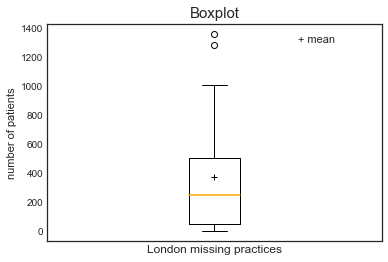

In [32]:
meanpointprops = dict(marker='+', markeredgecolor='black',markerfacecolor='firebrick') # settings mean representation
medianprops = dict(linewidth=1.5,color='orange') # settings median representation
plt.boxplot(ldn_practices_missing['NUMBER_OF_PATIENTS'], showmeans=True, meanprops=meanpointprops, medianprops=medianprops)
plt.title('Boxplot', fontsize=15)
plt.ylabel('number of patients', fontsize=11)
plt.xticks([1],['London missing practices'], fontsize=12)
plt.annotate('+ mean', xy=(1.25,1300), fontsize=11)
plt.show()

In [33]:
# We drop from df2_ldn practices which have missing values for ITEMS and ACTUAL_COST, they would not be useful for a statistical analysis
df2_ldn=df2_ldn.dropna()
df2_ldn.shape

(1299, 4)

In [34]:
no_patients_ldn_bypractice.describe()

,NUMBER_OF_PATIENTS
count,1323.000000
mean,7446.113379
std,4649.138337
min,1.000000
25%,4330.000000
50%,6659.000000
75%,9779.500000
max,72227.000000


A quick analysis of descriptive statistics parameters of these practices reveals that these GP practices tend to have a lower number of patients than the rest of London GP practices which appear on the prescribing dataset. While it could be plausible that a low number of patients is correlated with no prescriptions in April 2018, there are many other factors that are not known. Notwithstanding, these practices have been removed from further analysis, since missing values might add ambiguity to the results.

Herein, we have analysed the GP practices located in Cambridge.

In [35]:
# Identification of all GP practices located in Cambridge
list_cb_practice=practice('Cambridge') 
print('There are {} registered GP practices in the city of Cambridge in April 2018.\nThe codes of the GP practices in the city of Cambridge are the following: \n{}.'.format(len(list_cb_practice[1]),list_cb_practice[0]))

There are 37 registered GP practices in the city of Cambridge in April 2018.
The codes of the GP practices in the city of Cambridge are the following: 
['D81001', 'D81002', 'D81003', 'D81005', 'D81009', 'D81012', 'D81013', 'D81016', 'D81017', 'D81025', 'D81028', 'D81033', 'D81035', 'D81037', 'D81041', 'D81042', 'D81043', 'D81044', 'D81051', 'D81054', 'D81055', 'D81056', 'D81058', 'D81066', 'D81070', 'D81078', 'D81084', 'D81085', 'D81086', 'D81602', 'D81607', 'D81612', 'D81637', 'Y00056', 'F81009', 'F81015', 'F81034'].


In [36]:
# Number of registered patients per GP practice in the city of Cambridge
no_patients_cb=no_patients('Cambridge')
print('The number of patients registered in Cambridge GP practices in April 2018 is {}, which is {}% of the total.'.format(no_patients_cb[0],no_patients_cb[1]))

#Number of prescriptions issued per GP practice in the city of Cambridge
no_prescriptions_cb=no_prescriptions('Cambridge')
print('The number of prescriptions issued by Cambridge GP practices in April 2018 is {}, which is {}% of the total.'.format(no_prescriptions_cb[0],no_prescriptions_cb[1]))

#Actual cost of prescriptions in Cambridge GP practices
total_cost_cb=total_cost('Cambridge')
print('The total actual cost of the prescriptions issued by Cambridge GP practices in April 2018 is {} £, which is {}% \nof the total.'.format(total_cost_cb[0],total_cost_cb[1]))

print('The data is captured in the following table:')
d_cb={'number of practices':len(list_cb_practice[1]),'number of patients':no_patients_cb[0],'number of prescriptions':no_prescriptions_cb[0],'total actual cost':total_cost_cb[0]}
i_cb=['Cambridge']
df_cb=pd.DataFrame(data=d_cb, index=i_cb).T
df_cb

The number of patients registered in Cambridge GP practices in April 2018 is 366333, which is 0.62% of the total.
The number of prescriptions issued by Cambridge GP practices in April 2018 is 417095, which is 0.47% of the total.
The total actual cost of the prescriptions issued by Cambridge GP practices in April 2018 is 2931133.94 £, which is 0.46% 
of the total.
The data is captured in the following table:


,Cambridge
number of practices,37.00
number of patients,366333.00
number of prescriptions,417095.00
total actual cost,2931133.94


In [37]:
# Number of registered patients in Cambridge by practice
no_patients_cb_bypractice = list_cb_practice[1][['CODE','NUMBER_OF_PATIENTS']] # Patients in each particular London GP practice

# Number of prescriptions in Cambridge by practice
no_presc_cost_cb=no_presc_cost_city('Cambridge')

# Create a DataFrame with these data by merging the previous results
df2_cb=pd.merge(no_presc_cost_cb,no_patients_cb_bypractice,how='outer',left_on='PRACTICE',
                 right_on='CODE')
list_column=['CODE','NUMBER_OF_PATIENTS','ITEMS','ACTUAL_COST']
df2_cb=df2_cb[list_column]
df2_cb.head()

,CODE,NUMBER_OF_PATIENTS,ITEMS,ACTUAL_COST
0,D81001,12057,6679,65873.09
1,D81002,16939,13885,90156.76
2,D81003,9927,11572,71266.77
3,D81005,14941,6918,63413.35
4,D81009,9071,11378,84364.61


In [38]:
df2_cb.isnull().any()

CODE                  False
NUMBER_OF_PATIENTS    False
ITEMS                 False
ACTUAL_COST           False
dtype: bool

Unlike London GP Practices, both df1 and df2 contain the same number of GP Practices in Cambridge in April 2018.

In [39]:
# Top 10 most frequent drugs prescribed in Cambridge GP practices
freq2_cb=top10_drugs('Cambridge')
top10_cb=pd.DataFrame(freq2_cb.head(10).reset_index(0, drop=True))
top10_cb['%']=(top10_cb['ITEMS']/top10_cb['ITEMS'].sum())*100
top10_cb

,BNF_NAME,BNF_CODE,ITEMS,%
0,Omeprazole,0103050P0AAAAAA,15291,14.064311
1,Atorvastatin,0212000B0AAAAAA,15097,13.885874
2,Levothyrox,0602010V0AABWBW,14400,13.244789
3,Amlodipine,0206020A0AAAAAA,10476,9.635584
4,Colecal,0906040G0AAANAN,9979,9.178455
5,Aspirin,0209000A0AAABAB,9446,8.688214
6,Simvastatin,0212000Y0AAAAAA,9401,8.646824
7,Bisoprolol,0204000H0AAAAAA,8902,8.187855
8,Lisinopril,0205051L0AAAAAA,8675,7.979066
9,Salbutamol,0301011R0AAAPAP,7055,6.489027


In [40]:
# Bottom 10 less frequent drugs prescribed in Cambridge GP practices
bottom10_cb=bottom10_drugs('Cambridge')
bottom10_cb

prescription frequency 
 (items)                        1                   \
                                                 BNF_NAME         BNF_CODE   
0                                                ConvaTec      23964809625   
1                                                    Lamb  0906025P0BJAABF   
2                                           Levocarnitine  0908010Z0AAABAB   
3                                               Ibuprofen  1001010APAAAAAA   
4                                                 Sativex  1002020Y0BBABAB   
5                                              Transvasin  1003020T0BBAAAA   
6                                                    Deep  1003020Y0BDABAC   
7                                                  Ferric  0901011Y0AAAAAA   
8                                                      GF      22801978004   
9                                               Degarelix  0803042R0AAAAAA   
10                                              Nonoxinol  0703030G0AAAIAI   
11                                               Neomycin  0501040N0AAADAD   
12                                            Chloramphen  0501070F0AAAAAA   
13                                             Vancomycin  0501070U0AAAAAA   
14                                             Tinidazole  0501110G0AAABAB   
15                                  Saxagliptin/Metformin  0601023AHAAABAB   
16                                Dapagliflozin/Metformin  0601023ALAAAAAA   
17                                               Eudemine  0601040E0BBAAAA   
18                                          Nature-Throid  0602010Z0BDAAAB   
19                                               Dexameth  0603020H0AAALAL   
20                                               Selenium  090504700AABCBC   
21                                                Osvaren  0905022U0BBAAAA   
22                                              Magnesium  0905013P0AAAAAA   
23                                                Mevalia  0904010V0BGAAAD   
24                                             Sucralfate  0103030S0AAAAAA   
25                                             Germoloids  0107010N0BFAAA0   
26                                               Xipamide  0202010Y0AAAAAA   
27                                            Lasilactone  0202040T0BBAAAA   
28                                         Furosemide/Pot  0202080K0AAABAB   
29                                            Dronedarone  0203020X0AAAAAA   
..                                                    ...              ...   
158                                               Amobarb  0401030E0AAAAAA   
159                                   Felodipine/Ramipril  0205051S0AAABAB   
160                                             Quinapril  0205051P0AAAAAA   
161                                            Fosinopril  0205051J0AAABAB   
162                                                L.IN.C      22502655017   
163                                       Aspirin/Codeine  0407010W0AAADAD   
164                                               Cutimed      20030800150   
165                                          MicardisPlus  0205052R0BBAAAA   
166                                             ActiLymph      21270000798   
167                                              ConvaTec      22604806001   
168                                              Teleflex      22704887000   
169                                            Beambridge      22800758000   
170                                              ConvaTec      22404804001   
171                                             Haddenham      21270002480   
172                                              Sigvaris      21270002192   
173                                              Sigvaris      21270001036   
174                                              Tegaderm      20032400003   
175                                               Kapitex      20050100102   
176                   

While London is the most populated city in Western Europe and amongst the most populated worldwide, Cambridge is a middle-sized city with a population of ~125,000 inhabitants. The idiosyncrasy of the lifestyles of the peoples living in these two cities might impact in a different fashion the way the healthcare system is run. This is why in the next lines of code, a statistical descriptive analysis has been performed, so that a conclusion about the potentially contrasting tendencies of these two urban areas could be drawn.

In [41]:
df_abs=df_ldn.merge(df_cb, right_index=True, left_index=True)
df_abs['Ratio London / Cambridge']=np.round(np.divide(df_abs['London'],df_abs['Cambridge']),1)
df_abs.index.name=r'$\Sigma$'
df_abs

,London,Cambridge,Ratio London / Cambridge
$\Sigma$,,,
number of practices,1323.00,37.00,35.8
number of patients,9851208.00,366333.00,26.9
number of prescriptions,10416926.00,417095.00,25.0
total actual cost,76586738.71,2931133.94,26.1


As expected, the absolute number of practices, patients, prescriptions and the costs of the whole London GP practices are higher than the same parameters for the city of Cambridge. However, a closer look at these variables depending on the city might shed some light on the statistical analysis for this report.

In [42]:
def ratio(a, b):
    ratio=np.round(np.divide(a,b),2)
    return ratio

In [43]:
iterables=[['number of patients','items','actual cost'],
        ['mean', 'median',r'$\Sigma$']]
index=pd.MultiIndex.from_product(iterables)
df_rel=pd.DataFrame(index=index, columns=['London','Cambridge','Ratio London/Cambridge'])
df_rel['London']=[int(df2_ldn['NUMBER_OF_PATIENTS'].mean()),int(df2_ldn['NUMBER_OF_PATIENTS'].quantile(.5)),df_abs.loc['number of patients','London'], 
                  int(df2_ldn['ITEMS'].mean()),int(df2_ldn['ITEMS'].quantile(.5)),df_abs.loc['number of prescriptions','London'],
                  int(df2_ldn['ACTUAL_COST'].mean()),int(df2_ldn['ACTUAL_COST'].quantile(.5)), df_abs.loc['total actual cost','London']]
df_rel['Cambridge']=[np.round(df2_cb['NUMBER_OF_PATIENTS'].mean(),0),int(df2_cb['NUMBER_OF_PATIENTS'].quantile(.5)),df_abs.loc['number of patients','Cambridge'], 
                     np.round(df2_cb['ITEMS'].mean(),0),int(df2_cb['NUMBER_OF_PATIENTS'].quantile(.5)),df_abs.loc['number of prescriptions','Cambridge'],
                     np.round(df2_cb['ACTUAL_COST'].mean(),2),int(df2_cb['ACTUAL_COST'].quantile(.5)),df_abs.loc['total actual cost','Cambridge']]
df_rel['Ratio London/Cambridge']=[ratio(df_rel.loc[('number of patients','mean'),'London'],df_rel.loc[('number of patients','mean'),'Cambridge']),
                                  ratio(df_rel.loc[('number of patients','median'),'London'],df_rel.loc[('number of patients','median'),'Cambridge']),
                                  df_abs.loc['number of practices','Ratio London / Cambridge'],
                                  ratio(df_rel.loc[('items','mean'),'London'],df_rel.loc[('items','mean'),'Cambridge']),
                                  ratio(df_rel.loc[('items','median'),'London'],df_rel.loc[('items','median'),'Cambridge']),
                                  df_abs.loc['number of prescriptions','Ratio London / Cambridge'],
                                  ratio(df_rel.loc[('actual cost','mean'),'London'],df_rel.loc[('actual cost','mean'),'Cambridge']),
                                  ratio(df_rel.loc[('actual cost','median'),'London'],df_rel.loc[('actual cost','median'),'Cambridge']),
                                  df_abs.loc['total actual cost','Ratio London / Cambridge']]
df_rel

London   Cambridge  Ratio London/Cambridge
number of patients mean          7576.00     9901.00                    0.77
                   median        6815.00     9063.00                    0.75
                   $\Sigma$   9851208.00   366333.00                   35.80
items              mean          8019.00    11273.00                    0.71
                   median        6712.00     9063.00                    0.74
                   $\Sigma$  10416926.00   417095.00                   25.00
actual cost        mean         58958.00    79219.84                    0.74
                   median       50571.00    71695.00                    0.71
                   $\Sigma$  76586738.71  2931133.94                   26.10

By analysing the measures of central tendency displayed in this table, it is possible to claim that overall, a Cambridge GP practice has a higher number of patients than a practice in London. It is thus logical that number of prescriptions is also higher and hence the total cost as well. With the aim to further understand this statement, we have explored the distribution of these parameters in both cities by plotting histograms and checked the normality of data (graphically and analytically with skewness and kurtosis symmetry measures) and boxplots comparing them and identifying outliers.

In [44]:
def plot_hist(var1):
    multiply1=1
    if var1=='patients':
        column='NUMBER_OF_PATIENTS'
        var1='number of patients'
        title='number of patients by city'
    if var1=='prescriptions':
        column='ITEMS'
        var1='number of prescriptions'
        title='number of prescriptions by city'
    if var1=='cost':
        column='ACTUAL_COST'
        var1='cost/£'
        title='practice cost by city'
        multiply1=10 #correction factor to scale representations for 'ACTUAL_COST'
        
    plt.figure(figsize=(10,6))
    ax1=plt.subplot(221)
    ax2=plt.subplot(223)
    ax3=plt.subplot(122)
    
    bins1=np.arange(0,round(max(df2_ldn[column])/500*multiply1)*500*multiply1, 2500*multiply1)
    bins2=np.arange(0,round(max(df2_cb[column])/500*multiply1)*500*multiply1, 2500*multiply1)

    ax1.hist(df2_ldn[column],bins=bins1,color='steelblue', edgecolor='black', alpha=0.7, align='right')
    ax1.set_xticks(bins1)
    ax1.tick_params(labelrotation=90)
    ax1.set_xlim(0,30000*multiply1)
    ax1.set_xlabel(var1)
    ax1.set_ylabel('number of GP practices')
    ax1.set_title('Histogram of London')
    ax1.grid(True)
    ax1.text(20000*multiply1,300,'skew = '+str(np.round(skew(df2_ldn[column]),2)),fontsize=13.5, 
         color='steelblue', fontweight='bold')
    ax1.text(20000*multiply1,260,'kurt = '+str(np.round(kurtosis(df2_ldn[column]),2)),fontsize=13.5, 
         color='steelblue', fontweight='bold')
    ax1.get_xaxis().get_major_formatter().set_scientific(False)
    
    ax2.hist(df2_cb[column],bins=bins2,color='orange', edgecolor='black', alpha=0.7, align='right')
    ax2.set_xticks(bins2)
    ax2.tick_params(labelrotation=90)
    ax2.set_xlim(0,38000*multiply1)
    ax2.set_ylim(0,12)
    ax2.set_xlabel(var1)
    ax2.set_ylabel('number of GP practices')
    ax2.set_title('Histogram of Cambridge')
    ax2.grid(True)
    ax2.text(25000*multiply1,8.5,'skew = '+str(np.round(skew(df2_cb[column]),2)),fontsize=13.5, 
         color='orange', fontweight='bold')
    ax2.text(25000*multiply1,7.25,'kurt = '+str(np.round(kurtosis(df2_cb[column]),2)),fontsize=13.5, 
         color='orange', fontweight='bold')
    ax2.get_xaxis().get_major_formatter().set_scientific(False)
    
    boxplot=[df2_ldn[column],df2_cb[column]]
    ax3.boxplot(boxplot,showmeans=True, meanprops=meanpointprops, medianprops=medianprops, widths=(0.5,0.5))
    ax3.set_ylabel(var1)
    ax3.set_title('Boxplot by city')

    plt.xticks([1,2],['London','Cambridge'])
    plt.suptitle(title, fontsize=16, y=1)
    plt.subplots_adjust(wspace=5, hspace=3)
    plt.tight_layout()
    plt.show()

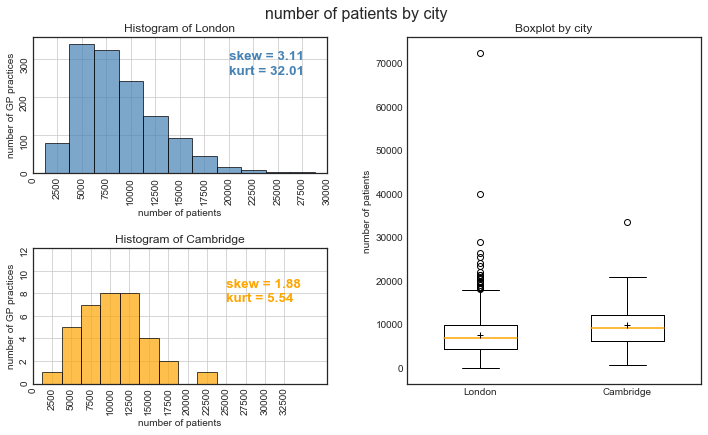

In [45]:
plot_hist('patients')

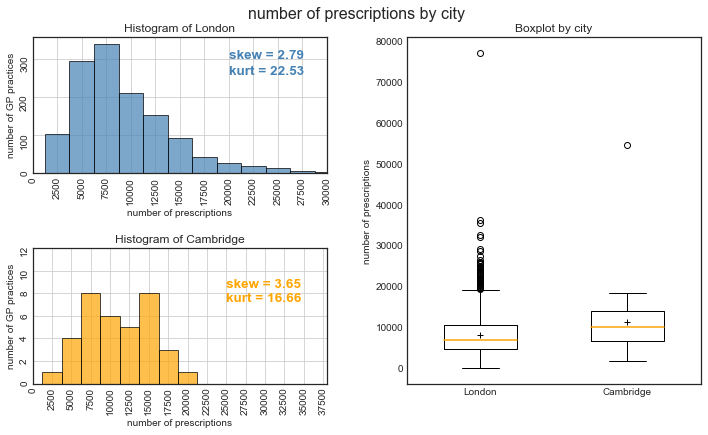

In [46]:
plot_hist('prescriptions')

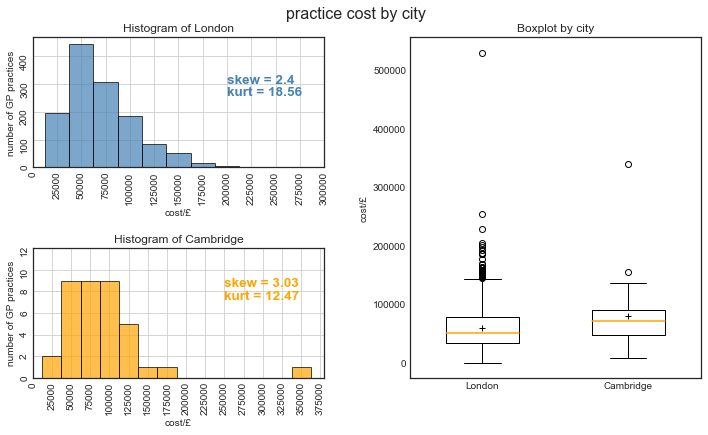

In [47]:
plot_hist('cost')

Previously, it has been surmised that a higher number of patients could imply higher costs for a practice. In the next graphs, we have represented scatterplots and fitted a regression line testing this hypothesis and contrasting the tendencies in London and Cambridge.

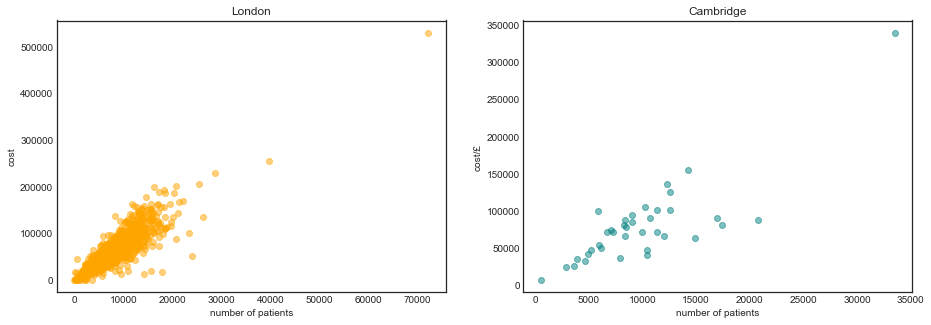

In [48]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2, figsize=(12,5))

ax1.scatter(df2_ldn['NUMBER_OF_PATIENTS'],df2_ldn['ACTUAL_COST'], c='orange', alpha=0.5)
ax1.set_xlabel('number of patients')
ax1.set_ylabel('cost')
ax1.set_title('London')

ax2.scatter(df2_cb['NUMBER_OF_PATIENTS'],df2_cb['ACTUAL_COST'], alpha=0.5,c='teal')
ax2.set_xlabel('number of patients')
ax2.set_ylabel('cost/£')
ax2.set_title('Cambridge')

plt.subplots_adjust(left=0.01, right=1)
plt.show()

Despite the fact that linear trends can be appreciated, it has been preferred to remove outliers or points with high leverage or influence in both graphs to fit a regression line.

In [49]:
df2_ldn_clean=df2_ldn[df2_ldn['NUMBER_OF_PATIENTS']<20000]
df2_ldn_clean_pat=df2_ldn_clean['NUMBER_OF_PATIENTS']
df2_ldn_clean_cost=df2_ldn_clean['ACTUAL_COST']

In [50]:
df2_cb_clean=df2_cb.sort_values(by='NUMBER_OF_PATIENTS')[:-1]
df2_cb_clean_pat=df2_cb_clean['NUMBER_OF_PATIENTS']
df2_cb_clean_cost=df2_cb_clean['ACTUAL_COST']

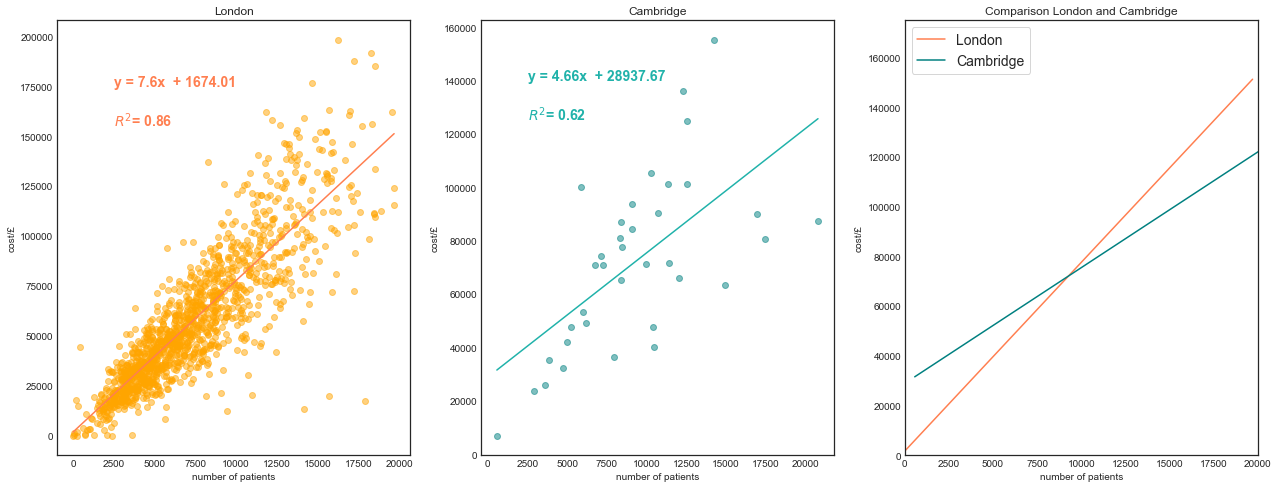

In [51]:
slope_ldn, intercept_ldn, r_value_ldn, p_value, std_err = stats.linregress(df2_ldn_clean_pat,df2_ldn_clean_cost)
fig,(ax1,ax2, ax3)=plt.subplots(nrows=1,ncols=3, figsize=(12,8))
x_ldn=df2_ldn_clean_pat.sort_values() # ordering of x values
yfit_ldn=[n*slope_ldn for n in x_ldn]+intercept_ldn
ax1.scatter(df2_ldn_clean_pat,df2_ldn_clean_cost,c='orange', alpha=0.5)
ax1.plot(x_ldn,yfit_ldn, c='coral')
ax1.annotate('y = '+str(np.round(slope_ldn,2))+'x '+' + '+ str(np.round(intercept_ldn,2)),
             xy=(2500,175000), fontsize=14, color='coral', weight='bold')
ax1.annotate(r'$R^2$= '+str(np.round(r_value_ldn,2)),xy=(2500,155000),fontsize=14,color='coral',weight='bold')
ax1.set_xlabel('number of patients')
ax1.set_ylabel('cost/£')
ax1.set_title('London')

slope_cb, intercept_cb, r_value_cb, p_value, std_err = stats.linregress(df2_cb_clean_pat,df2_cb_clean_cost)
x_cb=df2_cb_clean_pat.sort_values() # ordering of x values
yfit_cb=[n*slope_cb for n in x_cb]+intercept_cb
ax2.scatter(df2_cb_clean_pat,df2_cb_clean_cost, alpha=0.5,c='teal')
ax2.plot(x_cb,yfit_cb, c='lightseagreen')
ax2.annotate('y = '+str(np.round(slope_cb,2))+'x '+' + '+ str(np.round(intercept_cb,2)),
             xy=(2500,140000), fontsize=14, color='lightseagreen', weight='bold')
ax2.annotate(r'$R^2$= '+str(np.round(r_value_cb,2)),xy=(2500,125000),fontsize=14,color='lightseagreen',weight='bold')
ax2.set_xlabel('number of patients')
ax2.set_ylabel('cost/£')
ax2.set_title('Cambridge')

ax3.plot(x_ldn,yfit_ldn,c='coral')
ax3.plot(x_cb,yfit_cb,c='teal')
ax3.set_xlabel('number of patients')
ax3.set_ylabel('cost/£')
ax3.set_xlim(0,20000)
ax3.set_ylim(0,175000)
ax3.legend(['London','Cambridge'], frameon=True, loc='upper left', prop={'size':14})
ax3.set_title('Comparison London and Cambridge')

plt.subplots_adjust(left=0.01, right=1.4)
plt.show()

Here, it is possible to identify a linear trend for both cities. Indeed, the number of patients is positively correlated with the total cost per practice. It is worth mentioning however that the fit for the GP practices in Cambridge might not be as good. Interestingly, London GP practices with less than ~9000 patients cost less than Cambridge GP practices. This reverses after the break-even point.

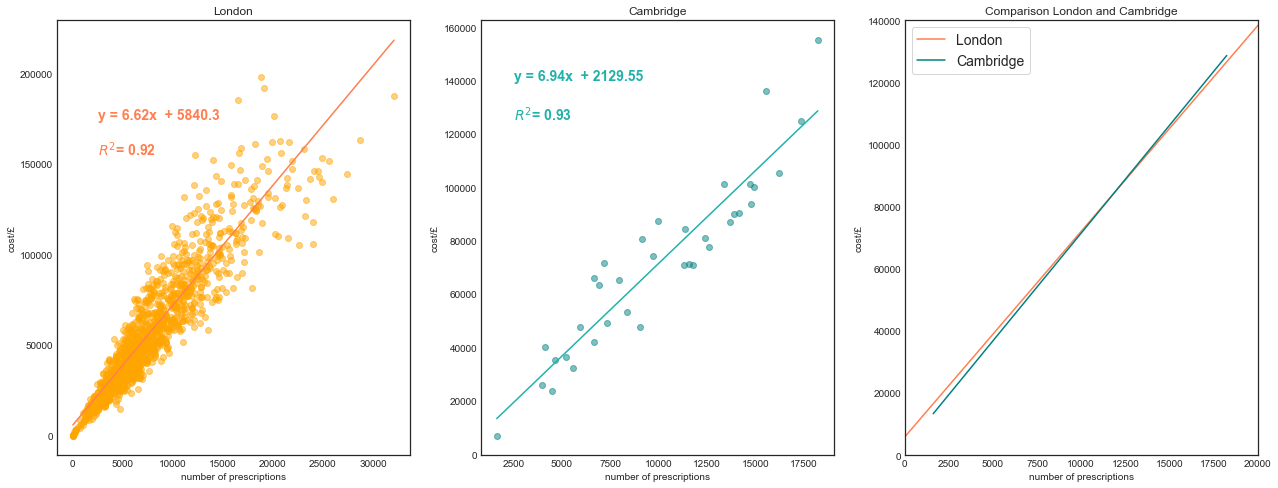

In [52]:
slope_ldn, intercept_ldn, r_value_ldn, p_value, std_err = stats.linregress(df2_ldn_clean['ITEMS'],df2_ldn_clean_cost)
fig,(ax1,ax2, ax3)=plt.subplots(nrows=1,ncols=3, figsize=(12,8))
x_ldn=df2_ldn_clean['ITEMS'].sort_values() # ordering of x values
yfit_ldn=[n*slope_ldn for n in x_ldn]+intercept_ldn
ax1.scatter(df2_ldn_clean['ITEMS'],df2_ldn_clean_cost,c='orange', alpha=0.5)
ax1.plot(x_ldn,yfit_ldn, c='coral')
ax1.annotate('y = '+str(np.round(slope_ldn,2))+'x '+' + '+ str(np.round(intercept_ldn,2)),
             xy=(2500,175000), fontsize=14, color='coral', weight='bold')
ax1.annotate(r'$R^2$= '+str(np.round(r_value_ldn,2)),xy=(2500,155000),fontsize=14,color='coral',weight='bold')
ax1.set_xlabel('number of prescriptions')
ax1.set_ylabel('cost/£')
ax1.set_title('London')

slope_cb, intercept_cb, r_value_cb, p_value, std_err = stats.linregress(df2_cb_clean['ITEMS'],df2_cb_clean_cost)
x_cb=df2_cb_clean['ITEMS'].sort_values() # ordering of x values
yfit_cb=[n*slope_cb for n in x_cb]+intercept_cb
ax2.scatter(df2_cb_clean['ITEMS'],df2_cb_clean_cost, alpha=0.5,c='teal')
ax2.plot(x_cb,yfit_cb, c='lightseagreen')
ax2.annotate('y = '+str(np.round(slope_cb,2))+'x '+' + '+ str(np.round(intercept_cb,2)),
             xy=(2500,140000), fontsize=14, color='lightseagreen', weight='bold')
ax2.annotate(r'$R^2$= '+str(np.round(r_value_cb,2)),xy=(2500,125000),fontsize=14,color='lightseagreen',weight='bold')
ax2.set_xlabel('number of prescriptions')
ax2.set_ylabel('cost/£')
ax2.set_title('Cambridge')

ax3.plot(x_ldn,yfit_ldn,c='coral')
ax3.plot(x_cb,yfit_cb,c='teal')
ax3.set_xlabel('number of prescriptions')
ax3.set_ylabel('cost/£')
ax3.set_xlim(0,20000)
ax3.set_ylim(0,140000)
ax3.legend(['London','Cambridge'], frameon=True, loc='upper left', prop={'size':14})
ax3.set_title('Comparison London and Cambridge')

plt.subplots_adjust(left=0.01, right=1.4)
plt.show()

As one would expect, there is a highly linear correlation between the number of prescriptions per GP practice and the total cost. Differences between these two cities are not substantial, as both lines almost overlap.

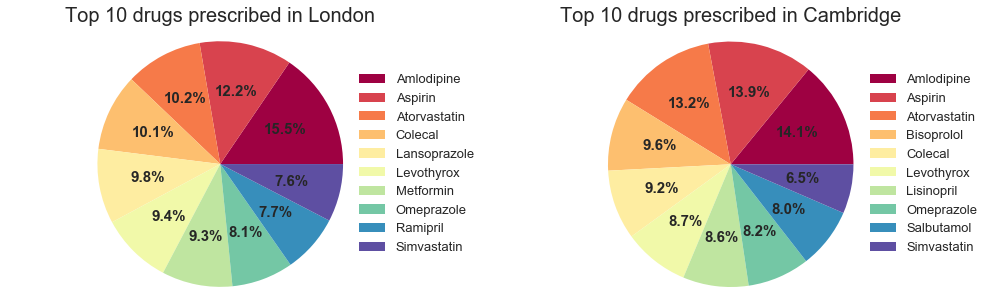

In [53]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,5))

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)] #Set the colors from Spectral colormap

sizes1=top10_ldn['%'].tolist()
labels1=top10_ldn['BNF_NAME'].sort_values().tolist()
patches1, texts1, autotexts1=ax1.pie(sizes1, colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.legend(labels1,loc='center left',bbox_to_anchor=(0.8, 0, 0, 1), prop={'size': 13})
ax1.set_title('Top 10 drugs prescribed in London', size=20)
plt.setp(autotexts1, size=15, weight="bold")

sizes2=top10_cb['%'].tolist()
labels2=top10_cb['BNF_NAME'].sort_values().tolist()
patches2, texts2, autotexts2=ax2.pie(sizes2, colors=colors, autopct='%1.1f%%', textprops=dict(weight='bold')) # pie chart characteristics
ax2.axis('equal') 
ax2.legend(labels2,loc='center left',bbox_to_anchor=(0.8, 0, 0, 1), prop={'size': 13}) # legend location settings
ax2.set_title('Top 10 drugs prescribed in Cambridge', size=20)
plt.subplots_adjust(left=0.1, right=1.4)
plt.setp(autotexts2, size=15, weight="bold")
plt.show()

Interestingly, there are drugs in common in the top 10 drugs prescribed in each city (Amlodipine, Aspirin, Atorvastatin, Colecal, Levothyrox, Omeprazol and Simvastatin). However, the proportion they represent is slightly different.

The NHS uses the British National Formulary (BNF) to classify the prescriptions issued by their GP practices. The BNF code structure specifies the BNF chapter in the characters 1 and 2 and the subsection in the characters 3 and 4 (please refer to https://digital.nhs.uk/data-and-information/areas-of-interest/prescribing/practice-level-prescribing-in-england-a-summary/practice-level-prescribing-glossary-of-terms for more details).

In the following lines of code, we have analysed and compared prescriptions for each therapeutic area in London and Cambridge as defined by the BNF.

In [54]:
look_up_chapter=pd.DataFrame(columns=['BNF Chapter','Therapeutic Area'])
look_up_chapter['BNF Chapter']=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','18','19','20','21','22','23']
look_up_chapter['Therapeutic Area']=['Gastro-Intestinal System','Cardiovascular System','Respiratory System','Central Nervous System','Infections','Endocrine System','Obstetrics, Gynae+Urinary Tract Disorders','Malignant Disease & Immunosuppression','Nutrition and Blood','Musculoskeletal & Joint Diseases','Eye','Ear, Nose and Oropharynx','Skin','Immunological Products & Vaccines', 'Anaesthesia','Preparations used in Diagnosis','Other Drugs and Preparations','Dressings','Appliances','Incontinence Appliances','Stoma Appliances']
look_up_chapter

,BNF Chapter,Therapeutic Area
0,01,Gastro-Intestinal System
1,02,Cardiovascular System
2,03,Respiratory System
3,04,Central Nervous System
4,05,Infections
5,06,Endocrine System
6,07,"Obstetrics, Gynae+Urinary Tract Disorders"
7,08,Malignant Disease & Immunosuppression
8,09,Nutrition and Blood
9,10,Musculoskeletal & Joint Diseases


In [55]:
def freq_chapter_city(city):
    freq1_city=freq_city(city) #We call a function already defined
    #Grouping by therapeutic area (first characters of BNF_CODES)
    freq_chapter_city=freq1_city.groupby(lambda c: freq1_city.iloc[c,1][:2]).sum().reset_index() 
    freq_chapter_city=pd.DataFrame(freq_chapter_city).rename(columns={'index':'BNF Chapter','ITEMS':'Number of prescriptions'})
    #Left join with look_up_chapter table
    freq_chapter_city=pd.merge(freq_chapter_city,look_up_chapter, how='left', left_on='BNF Chapter', right_on='BNF Chapter')
    #Calculation of percentage
    freq_chapter_city['Percentage']= np.round((freq_chapter_city['Number of prescriptions']/freq_chapter_city['Number of prescriptions'].sum())*100,2)
    #Sorting by descending order
    freq_chapter_city=freq_chapter_city.sort_values(by='Percentage', ascending=False).reset_index(0, drop=True)
    return freq_chapter_city

In [56]:
#Drug prescriptions by therapeutic area in London
freq_chapter_ldn=freq_chapter_city('London')
freq_chapter_ldn

,BNF Chapter,Number of prescriptions,Therapeutic Area,Percentage
0,02,3104617,Cardiovascular System,29.80
1,04,1651463,Central Nervous System,15.85
2,06,1209221,Endocrine System,11.61
3,01,892921,Gastro-Intestinal System,8.57
4,09,735620,Nutrition and Blood,7.06
5,03,645567,Respiratory System,6.20
6,13,401393,Skin,3.85
7,05,348466,Infections,3.35
8,21,309387,Appliances,2.97
9,07,291407,"Obstetrics, Gynae+Urinary Tract Disorders",2.80


In [57]:
# Drug prescriptions by therapeutic area in Cambridge
freq_chapter_cb=freq_chapter_city('Cambridge')
freq_chapter_cb

,BNF Chapter,Number of prescriptions,Therapeutic Area,Percentage
0,02,120136,Cardiovascular System,28.80
1,04,77571,Central Nervous System,18.60
2,06,43041,Endocrine System,10.32
3,01,37674,Gastro-Intestinal System,9.03
4,03,27244,Respiratory System,6.53
5,09,23928,Nutrition and Blood,5.74
6,05,15904,Infections,3.81
7,07,13897,"Obstetrics, Gynae+Urinary Tract Disorders",3.33
8,13,13793,Skin,3.31
9,10,12368,Musculoskeletal & Joint Diseases,2.97


In [58]:
#Comparison of prescription between London and Cambridge by therapeutic area
freq_chapter_compare=pd.merge(freq_chapter_ldn, freq_chapter_cb, 
                              how='outer',left_on='Therapeutic Area', right_on='Therapeutic Area').fillna(0)

freq_chapter_compare=freq_chapter_compare.drop(columns=['BNF Chapter_x', 'BNF Chapter_y', 
                                   'Number of prescriptions_x', 'Number of prescriptions_y']).rename(columns={'Percentage_x':'Percentage London', 'Percentage_y': 'Percentage Cambridge'})
freq_chapter_compare.sort_values(by='Percentage London', ascending=False)

,Therapeutic Area,Percentage London,Percentage Cambridge
0,Cardiovascular System,29.80,28.80
1,Central Nervous System,15.85,18.60
2,Endocrine System,11.61,10.32
3,Gastro-Intestinal System,8.57,9.03
4,Nutrition and Blood,7.06,5.74
5,Respiratory System,6.20,6.53
6,Skin,3.85,3.31
7,Infections,3.35,3.81
8,Appliances,2.97,2.36
9,"Obstetrics, Gynae+Urinary Tract Disorders",2.80,3.33


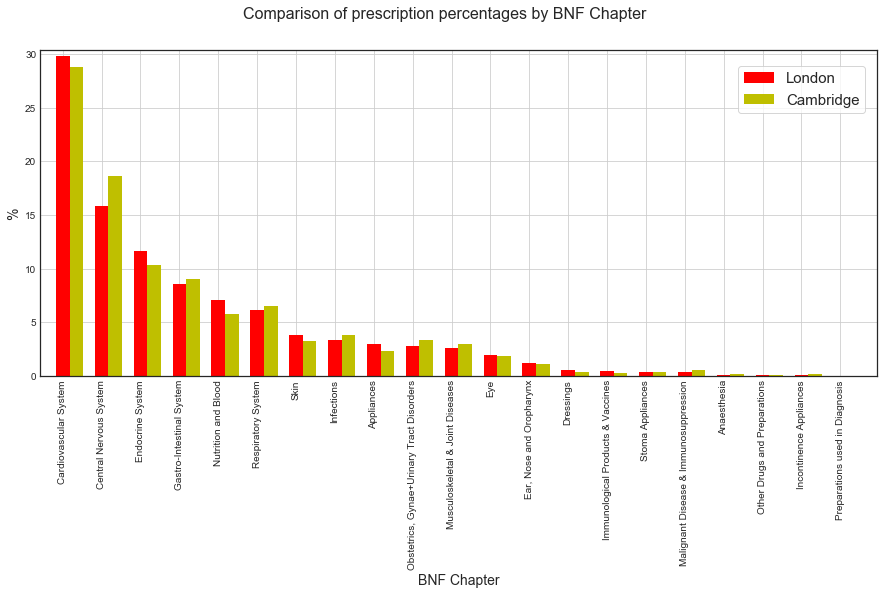

In [59]:
#Bar chart comparing prescription by therapeutic area by city
fig, ax=plt.subplots(figsize=(15,6))
ind=np.arange(len(freq_chapter_compare))
width=0.35

p1=ax.bar(ind, freq_chapter_compare['Percentage London'], width, color='r')
p2=ax.bar(ind+width, freq_chapter_compare['Percentage Cambridge'], width, color='y')
ax.set(xticks=ind,xticklabels=freq_chapter_compare['Therapeutic Area'])
ax.tick_params(axis='x', rotation=90)
ax.legend(['London','Cambridge'], frameon=True,loc='upper left',bbox_to_anchor=(0.825, 0, 0, 0.975),prop={'size': 15})
ax.grid(True)
ax.set_ylabel('%', size=14)
ax.set_xlabel('BNF Chapter', size=14)
fig.suptitle('Comparison of prescription percentages by BNF Chapter', size=16)
plt.margins(0.02)
plt.show()

Trends in London and Cambridge with regard to prescription depending on therapeutic area do not vary substantially. Cardiovascular system, central nervous system and endocrine system are the most prevalent drugs to be prescribed in both cities.

Since our interest is to describe the number of prescriptions and total actual cost across all NHS practices for drugs related to cardiovascular disease (CVD) and antidepressants (AD), we will be looking for the corresponding BNF codes in the coming lines of code.

In [60]:
# CVD BNF codes should start with '02', while BNF codes for AD with '0403'
# Total number of prescriptions for CVD
cvd_code=df2.BNF_CODE.str.match('^02')==True
no_prescriptions_cvd=np.sum(df2[cvd_code].ITEMS)
print('The total number of prescriptions for cardiovascular disease in the NHS is {} prescriptions.'.format(no_prescriptions_cvd))

# Actual cost of prescriptions for CVD
total_cost_prescriptions=np.round(np.sum(df2.ACTUAL_COST),2)
actual_cost_cvd=np.round(np.sum(df2[cvd_code].ACTUAL_COST),2)
print('The total cost of prescriptions for cardiovascular disease in the NHS is {} £.'.format(actual_cost_cvd))

# Total number of prescriptions for AD
ad_code=df2.BNF_CODE.str.match('^0403')==True
no_prescriptions_ad=np.sum(df2[ad_code].ITEMS)
print('The total number of antidepressants prescribed in the NHS is {}.'.format(no_prescriptions_ad))

# Actual cost of prescriptions for AD
actual_cost_ad =np.round(np.sum(df2[ad_code].ACTUAL_COST),2)
print('The total cost of prescriptions for antidepressants in the NHS is {} £.'.format(actual_cost_ad))

The total number of prescriptions for cardiovascular disease in the NHS is 26449832 prescriptions.
The total cost of prescriptions for cardiovascular disease in the NHS is 90193834.02 £.
The total number of antidepressants prescribed in the NHS is 5715873.
The total cost of prescriptions for antidepressants in the NHS is 16853470.86 £.


Once the impact of diseases from the cardiovascular and depression therapeutic areas has been assessed, we have described the total spending and relative costs per patient across the NHS system. This is particularly relevant to be able to track the expenses of GP practices, identify those which spend more and make informed decisions about how to tackle financial issues in the healthcare system.

In [61]:
#Total spending for the NHS in April 2018
df2_grouped=df2.groupby('PRACTICE',as_index=False)['ACTUAL_COST'].sum()
df3= pd.merge(df1, df2_grouped, left_on='CODE', right_on='PRACTICE').drop(columns=['PUBLICATION',
                                                'EXTRACT_DATE','TYPE','CCG_CODE','ONS_CCG_CODE','POSTCODE','SEX','AGE'])
df3['RELATIVE_SPENDING']=np.divide(df3['ACTUAL_COST'],df3['NUMBER_OF_PATIENTS'])
df3.head()

,CODE,NUMBER_OF_PATIENTS,PRACTICE,ACTUAL_COST,RELATIVE_SPENDING
0,A83005,11826,A83005,156599.88,13.241999
1,A83006,8044,A83006,89694.95,11.150541
2,A83010,14070,A83010,210441.47,14.956750
3,A83013,11298,A83013,137665.38,12.184934
4,A83031,10109,A83031,128457.68,12.707259


In [62]:
df3.describe()

,NUMBER_OF_PATIENTS,ACTUAL_COST,RELATIVE_SPENDING
count,7191.000000,7191.000000,7191.000000
mean,8207.557224,87842.769907,11.606497
std,5161.846053,59133.286587,38.868946
min,3.000000,3.250000,0.001724
25%,4557.000000,45118.630000,8.875578
50%,7278.000000,76206.840000,10.914659
75%,10742.500000,117871.110000,12.690038
max,72227.000000,842838.180000,2830.020000


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7191 entries, 0 to 7190
Data columns (total 5 columns):
CODE                  7191 non-null object
NUMBER_OF_PATIENTS    7191 non-null int64
PRACTICE              7191 non-null object
ACTUAL_COST           7191 non-null float64
RELATIVE_SPENDING     7191 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 337.1+ KB


The slope for this trendline is 10.04 and the intercept is 5417.58.


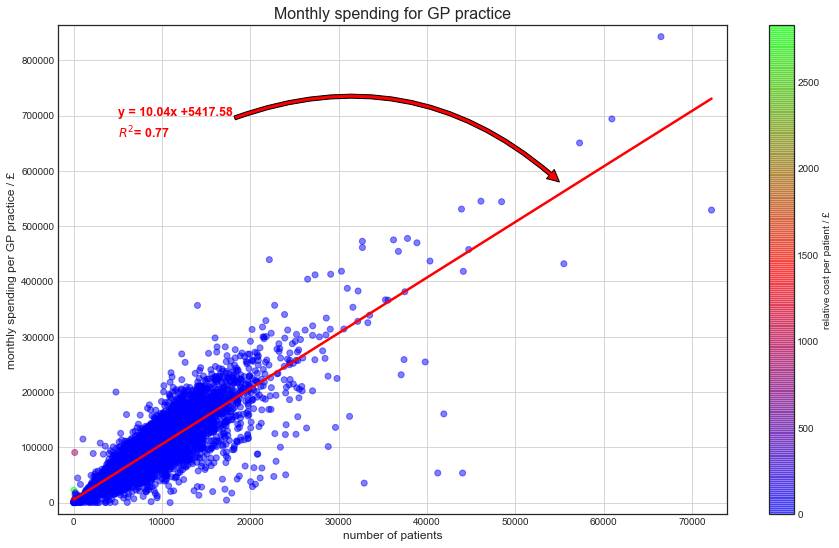

In [64]:
#Scatter plot
fig, ax=plt.subplots(figsize=(15,9))
plt.style.use('seaborn-white')

# Scatterplot with colourbar
scatter=ax.scatter(df3['NUMBER_OF_PATIENTS'],df3['ACTUAL_COST'], c=df3['RELATIVE_SPENDING'],
                   cmap='brg', vmin=0, vmax=df3['RELATIVE_SPENDING'].max(), alpha=0.5)

# Axis
plt.xlabel('number of patients', size=12)
plt.ylabel('monthly spending per GP practice / £', size=12)
plt.yticks(np.arange(0,900000,100000))
plt.title('Monthly spending for GP practice', fontsize=16)
cbar=fig.colorbar(scatter) # colorbar set up
cbar.set_label('relative cost per patient / £')

#Trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(df3['NUMBER_OF_PATIENTS'],df3['ACTUAL_COST'])#slope and intercept calculation
print('The slope for this trendline is {} and the intercept is {}.'.format(np.round(slope,2),np.round(intercept,2)))
x=df3['NUMBER_OF_PATIENTS'].sort_values() # ordering of x values
yfit=[n*slope for n in x]+intercept

# Trendline plotting 
ax.plot(x, yfit,c='r',linestyle='-', linewidth=2.5)

# Annotation in the graph
ax.annotate('y = ' +str(np.round(slope,2))+'x +'+str(np.round(intercept,2)), xy=(55000,580000), xytext=(5000,700000),
            arrowprops=dict(facecolor='r', connectionstyle='arc3, rad=-0.3'), color='r', fontsize=12.5, weight='bold') 
ax.annotate(r'$R^2$= '+str(np.round(r_value**2,2)), xy=(5000,660000),color='r', fontsize=12.5, weight='bold')
ax.grid()

plt.margins(0.025)
plt.show()

A close inspection into the graph shown above reveals that there is a linear trend for GP practices, so that the greater the number of patients, the higher the monthly spending. Notably, the relative cost per patient is fairly homogeneous across all practices (<500£/patient per month).

In order to get a more detailed visualisation of the relative cost per patient, a histogram has been plotted, so that the distribution of this variable could be interpreted more easily.

In [65]:
def remove_outliers(df,column):
    from scipy.stats import iqr
    
    iqr=iqr(df[column]) #Interquartilic range
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    
    # 
    outliers_1=Q1-1.5*iqr
    outliers_2=Q3+1.5*iqr

    clean=df[column][(df[column]>outliers_1)&(df[column]<outliers_2)] #Reject datapoints considered outliers
    
    return clean

In [66]:
#First, outliers are removed
spending=remove_outliers(df3,'RELATIVE_SPENDING') #Call remove_outliers function
spending.describe()

count    7025.000000
mean       10.777284
std         2.727275
min         3.183002
25%         8.944339
50%        10.922939
75%        12.642940
max        18.357644
Name: RELATIVE_SPENDING, dtype: float64

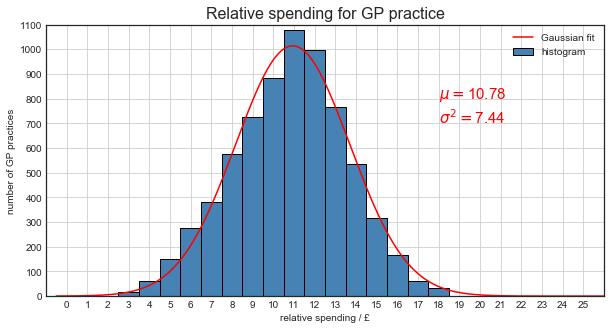

In [67]:
# Histogram plot
plt.subplots(figsize=(10,5))
bins=int(np.sqrt(len(spending))) # Square root of n to determine number of bins

# bin_h is an array with the height of the bins and bin_b is an array with the 'borders' of the bins displayed in the histogram
bin_h,bin_b,_=plt.hist(spending, bins=np.arange(bins)-0.5, 
                       color='steelblue', edgecolor='black', label='histogram')

# Axis
plt.xlim(-1,26)
plt.ylim(-1,1100) 
plt.ylabel ('number of GP practices')
plt.xlabel ('relative spending / £')
plt.xticks(np.arange(0,26,1))
plt.yticks(np.arange(0,1200,100))
plt.title('Relative spending for GP practice', fontsize=16)

from scipy.optimize import curve_fit

# Gaussian function to model the data
def gaussian(x, mean, amplitude, sd): 
    return amplitude * np.exp( - ((x - mean) / sd) ** 2) #

bin_c=bin_b[:-1]+np.diff(bin_b)/2 # bin_c is an array with the bin centres, that is, the values of each of the bins in the histogram
popt, _ = curve_fit(gaussian, bin_c, bin_h) # popt returns the best fit values for parameters of the Gaussian distribution
lnspc=np.linspace(bin_b[0],bin_b[-1], 10000) # array of x values for Gaussian function
plt.plot(lnspc,gaussian(lnspc,*popt), color='red', label='Gaussian fit') # plot it

plt.legend()
plt.text(18,800,r'$\mu = $'+str(np.round(spending.mean(),2)), fontsize=15, color='r') # mean of the distribution
plt.text(18,700,r'$\sigma^2 = $'+str(np.round(np.var(spending),2)), fontsize=15, color='r') # standard deviation of the distribution
plt.grid(True)
plt.show()

One of the most salient features of this histogram is that the relative cost per patient follows a normal distribution 
N ~ (10.78,7.44).

## World Health Organization (WHO) Mortality Database

In this section, an analysis of the data provided in the WHO Mortality Database has been performed. The Database contains relevant information about the cause of each death according to the 10th revision of the International Classification of Diseases (ICD-10) by country.

The analysis has been carried out for selected countries which have been deemed of interest, where several data and descriptive statistical parameters have been reported, so that the reader gets a grasp of demographics and mortality characteristics of these countries.

In [68]:
# The relevant datasets are read
country_codes=pd.read_csv('country_codes.csv') # https://www.who.int/healthinfo/statistics/country_codes.zip?ua=1
pop=pd.read_csv('pop.csv') # https://www.who.int/healthinfo/Pop.zip?ua=1

# low_memory entails that the whole file is read before deciding the type of each column 
morticd10_1=pd.read_csv('Morticd10_part1.csv', low_memory=False) # https://www.who.int/healthinfo/statistics/Morticd10_part1.zip?ua=1
morticd10_2=pd.read_csv('Morticd10_part2.csv', low_memory=False) # https://www.who.int/healthinfo/statistics/Morticd10_part2.zip?ua=1

First, we have explored the dataset.

In [69]:
# country_codes DataFrame is a look-up table which contains the four digit numeric code for each country
country_codes.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [70]:
# country_codes DataFrame has 227 entries with no null values
country_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
country    227 non-null int64
name       227 non-null object
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [71]:
# pop DataFrame contains columns total (Pop1) and age-stratified populations (Pop to Pop26) for each country considering year and sex
pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [72]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9349 entries, 0 to 9348
Data columns (total 33 columns):
Country    9349 non-null int64
Admin1     82 non-null float64
SubDiv     138 non-null object
Year       9349 non-null int64
Sex        9349 non-null int64
Frmat      9349 non-null int64
Pop1       9349 non-null float64
Pop2       9213 non-null float64
Pop3       9213 non-null float64
Pop4       5152 non-null float64
Pop5       5152 non-null float64
Pop6       5152 non-null float64
Pop7       9213 non-null float64
Pop8       9195 non-null float64
Pop9       9213 non-null float64
Pop10      9195 non-null float64
Pop11      9213 non-null float64
Pop12      9195 non-null float64
Pop13      9213 non-null float64
Pop14      9195 non-null float64
Pop15      9213 non-null float64
Pop16      9195 non-null float64
Pop17      9213 non-null float64
Pop18      9195 non-null float64
Pop19      9213 non-null float64
Pop20      9151 non-null float64
Pop21      9057 non-null float64
Pop22      819

The DataFrame pop has been preprocessed before use. Columns not considered to be relevant for the analysis (i.e. Admin1, SubDiv, etc.) will be dropped. The DataFrame has also been merged with the pop DataFrame, so that all the information is contained in a single DataFrame. Indeed, there are some columns with high missingness rates. However, this might not impact our analysis, since we are only going to focus on selected countries.

In [73]:
# Left join of both DataFrames and dropping of Admin1 and SubDiv columns
pop_country=pd.merge(pop, country_codes, how='left',left_on='Country',right_on='country').drop(columns=['Admin1','SubDiv','country'])
pop_country.head()

,Country,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,Pop5,Pop6,...,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,name
0,1060,1980,1,7,137100.0,3400.0,15800.0,NaN,NaN,NaN,...,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0,Cape Verde
1,1060,1980,2,7,159000.0,4000.0,18400.0,NaN,NaN,NaN,...,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0,Cape Verde
2,1125,1955,1,2,5051500.0,150300.0,543400.0,NaN,NaN,NaN,...,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0,Egypt
3,1125,1955,2,2,5049400.0,145200.0,551000.0,NaN,NaN,NaN,...,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0,Egypt
4,1125,1956,1,2,5353700.0,158700.0,576600.0,NaN,NaN,NaN,...,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0,Egypt


In [74]:
# Since morticd10_1 and morticd10_2 DataFrames are part of the same file split in two parts, they will be concatenated.
morticd10=pd.concat([morticd10_1,morticd10_2]).drop(columns=['Admin1','SubDiv'])
morticd10.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3587860 entries, 0 to 2199753
Data columns (total 37 columns):
Country       3587860 non-null int64
Year          3587860 non-null int64
List          3587860 non-null object
Cause         3587860 non-null object
Sex           3587860 non-null int64
Frmat         3587860 non-null int64
IM_Frmat      3587860 non-null int64
Deaths1       3587860 non-null int64
Deaths2       3585618 non-null float64
Deaths3       3585618 non-null float64
Deaths4       3420612 non-null float64
Deaths5       3420612 non-null float64
Deaths6       3420612 non-null float64
Deaths7       3585618 non-null float64
Deaths8       3582633 non-null float64
Deaths9       3585618 non-null float64
Deaths10      3582633 non-null float64
Deaths11      3585618 non-null float64
Deaths12      3582633 non-null float64
Deaths13      3585618 non-null float64
Deaths14      3582633 non-null float64
Deaths15      3585618 non-null float64
Deaths16      3582633 non-null float64
Deat

In [75]:
# Exploration of the DataFrame
morticd10.head()

,Country,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,2001,101,1000,1,7,8,332,8.0,2.0,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,2001,101,1000,2,7,8,222,11.0,1.0,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,2001,101,1001,1,7,8,24,0.0,0.0,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,2001,101,1001,2,7,8,14,0.0,0.0,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,2001,101,1002,1,7,8,0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [76]:
# Merge with country_code DataFrame
morticd10_country=pd.merge(morticd10, country_codes, how='left',left_on='Country',right_on='country').drop(['country'], axis=1)
morticd10_country.head()

,Country,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,name
0,1400,2001,101,1000,1,7,8,332,8.0,2.0,...,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,Seychelles
1,1400,2001,101,1000,2,7,8,222,11.0,1.0,...,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,Seychelles
2,1400,2001,101,1001,1,7,8,24,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
3,1400,2001,101,1001,2,7,8,14,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
4,1400,2001,101,1002,1,7,8,0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles


Once the datasets to be used have been cleaned, we will proceed with the data analysis. In the first instance, missingness was checked. Since this was not an issue, the total population and deaths of Iceland, Italy and New Zealand in 2010 were reported without further data manipulation.

In [77]:
pop_country[(pop_country['name'].str.match('Australia'))&(pop_country['Year']==2010)].isna().sum()

Country    0
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      0
Pop25      0
Pop26      0
Lb         0
name       0
dtype: int64

In [78]:
pop_country[(pop_country['name'].str.match('Italy'))&(pop_country['Year']==2010)].isna().sum()

Country    0
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      0
Pop25      0
Pop26      0
Lb         0
name       0
dtype: int64

In [79]:
pop_country[(pop_country['name'].str.match('Iceland'))&(pop_country['Year']==2010)].isna().sum()

Country    0
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      0
Pop25      0
Pop26      0
Lb         0
name       0
dtype: int64

In [80]:
# Function to calculate population and total number of deaths in 2010 (for all ages and all causes)
def country_pop():
    while True:
        x=input('Choose the country: Iceland, Italy or New Zealand:')
        if x=='Iceland' or x=='Italy' or x=='New Zealand':
            # Calculate the total population
            locations_pop=pop_country[(pop_country['name'].str.match(x))&(pop_country['Year']==2010)].index.tolist()
            total_pop=np.sum(pop_country.iloc[locations_pop].Pop1.sum())
            # Calculate total number of deaths
            locations_death=morticd10_country[(morticd10_country['name'].str.match(x))&(morticd10_country['Year']==2010)].index.tolist()
            total_death=morticd10_country.iloc[locations_death,7].sum()
            print('According to WHO Mortality Database, the population of {} in 2010 was {} inhabitants and \nthe total number of deaths was {}.'.format(x,total_pop, total_death))
            break
        else:
            print('Error! Please type only Iceland, Italy or New Zealand.')

In [81]:
country_pop()

Choose the country: Iceland, Italy or New Zealand:Iceland
According to WHO Mortality Database, the population of Iceland in 2010 was 318041.0 inhabitants and 
the total number of deaths was 4038.


In [82]:
country_pop()

Choose the country: Iceland, Italy or New Zealand:Italy
According to WHO Mortality Database, the population of Italy in 2010 was 60483386.0 inhabitants and 
the total number of deaths was 1169230.


In [83]:
country_pop()

Choose the country: Iceland, Italy or New Zealand:New Zealand
According to WHO Mortality Database, the population of New Zealand in 2010 was 4367360.0 inhabitants and 
the total number of deaths was 57298.


Afterwards, we analysed the distribution of total deaths in Italy by age group across all the dataset. First, we created a new column for the 0-4 year old age group and then we plotted it in an horizontal bar chart, as customary for demographic analysis.

In [84]:
# Distribution of deaths by age group in Italy (for all causes and years)
# Creation of the age group 0-4 yrs
morticd10_country['0-4 yrs']=np.sum(morticd10_country.iloc[:,8:12], axis=1) 

# Renaming, dropping and reordering of morticd10_country colums for clarification purposes
morticd10_country=morticd10_country.rename(index=str,columns={'name':'Name','Deaths7':'5-9 yrs', 'Deaths8':'10-14 yrs', 'Deaths9':'15-19 yrs', 'Deaths10':'20-24 yrs', 'Deaths11':'25-29 yrs', 'Deaths12':'30-34 yrs', 'Deaths13':'35-39 yrs', 'Deaths14':'40-44 yrs', 'Deaths15':'45-49 yrs', 'Deaths16':'50-54 yrs', 'Deaths17':'55-59 yrs', 'Deaths18':'60-64 yrs', 'Deaths19':'65-69 yrs', 'Deaths20':'70-74 yrs', 'Deaths21':'75-79 yrs', 'Deaths22':'80-84 yrs', 'Deaths23':'85-89 yrs', 'Deaths24':'90-94 yrs', 'Deaths25':'>95 yrs', 'Deaths26':'Age unspecified'}).drop(columns=['Deaths1','Deaths2','Deaths3','Deaths4','Deaths5','Deaths6'])
morticd10_country=morticd10_country[['Country','Name','Year','List','Sex','Cause','0-4 yrs','5-9 yrs','10-14 yrs', '15-19 yrs', '20-24 yrs', '25-29 yrs', '30-34 yrs', '35-39 yrs', '40-44 yrs', '45-49 yrs', '50-54 yrs', '55-59 yrs', '60-64 yrs', '65-69 yrs', '70-74 yrs', '75-79 yrs', '80-84 yrs', '85-89 yrs', '90-94 yrs', '>95 yrs','Age unspecified','IM_Deaths1','IM_Deaths2','IM_Deaths3','IM_Deaths4','Frmat','IM_Frmat',]]
morticd10_country.head()

,Country,Name,Year,List,Sex,Cause,0-4 yrs,5-9 yrs,10-14 yrs,15-19 yrs,...,85-89 yrs,90-94 yrs,>95 yrs,Age unspecified,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Frmat,IM_Frmat
0,1400,Seychelles,2001,101,1,1000,10.0,1.0,NaN,9.0,...,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,7,8
1,1400,Seychelles,2001,101,2,1000,12.0,1.0,NaN,1.0,...,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,7,8
2,1400,Seychelles,2001,101,1,1001,0.0,0.0,NaN,1.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7,8
3,1400,Seychelles,2001,101,2,1001,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7,8
4,1400,Seychelles,2001,101,1,1002,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7,8


In [85]:
# Checking missingness
morticd10_country.loc[morticd10_country['Name']=='Italy','0-4 yrs':'>95 yrs'].isna().sum()

0-4 yrs      0
5-9 yrs      0
10-14 yrs    0
15-19 yrs    0
20-24 yrs    0
25-29 yrs    0
30-34 yrs    0
35-39 yrs    0
40-44 yrs    0
45-49 yrs    0
50-54 yrs    0
55-59 yrs    0
60-64 yrs    0
65-69 yrs    0
70-74 yrs    0
75-79 yrs    0
80-84 yrs    0
85-89 yrs    0
90-94 yrs    0
>95 yrs      0
dtype: int64

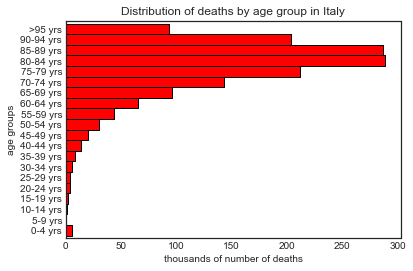

In [86]:
# Analysis and representation of the distribution
# Selection of columns with age groups (age unspecified is not considered as cannot be categorised in any age group and would not be informative)
distr_deaths=pd.DataFrame(np.sum(morticd10_country.loc[morticd10_country['Name']=='Italy','0-4 yrs':'>95 yrs'])/10e3)
# In demographic pyramids, the distribution of age groups tends to be plotted horizontally
distr_deaths.plot(kind='barh', legend=False, color='red', width=1, edgecolor='black') 
plt.xlabel('thousands of number of deaths')
plt.ylabel('age groups')
plt.title('Distribution of deaths by age group in Italy')
plt.show()

Having analysed the distribution of total deaths in Italy in 2010, we then put the focus on neoplasm, which is a prevalent disease in developed countries. In the first place, we have identified the top-5 causes of deaths for this disease with the ICD-10 codes. Importantly, ICD-10 have a minimum of three characters which indicate the cause of the disease. However, further granularity is allowed and the code can be extended with up to seven characters. Consequently, we have taken two different approaches to identify the top-5 causes: a 'specific' approach which takes into account all the characters and a 'generic' approach which only considers the first three characters.

In [87]:
# Generation of a table with the cause of death, number of deaths and proportion of overall deaths for top-5 Neoplasm ICD10-category in Italy
# First, a variable with the relevant columns is created (including unspecified age)
italy_neoplasm=morticd10_country[(morticd10_country['Name']=='Italy')&morticd10_country['Cause'].str.match('^C[0-9][0-9]|^D([0-3][0-9]|4[0-8])')][morticd10_country.iloc[:,5:26].columns.tolist()]

# Second, all the deaths per age group are added and ordered in descending order
no_deaths_neoplasm_it_specific=np.sum(italy_neoplasm.groupby('Cause').sum(), axis=1).sort_values(ascending=False)

# Third, the proportion of overall deaths is calculated
proportion_specific= np.divide(no_deaths_neoplasm_it_specific.head(5),no_deaths_neoplasm_it_specific.sum())

# The data is captured in a DataFrame
data={'number of deaths':no_deaths_neoplasm_it_specific.head(5),'proportion of overall deaths':proportion_specific}
no_deaths_neoplasm_it_specific_df=pd.DataFrame(data=data).rename({'C349':'Bronchus or lung. Unspecified', 'C509':'Breast. Unspecified', 'C189':'Colon. Unspecified', 'C169':'Stomach. Unspecified', 'C259':'Pancreas. Unspecified'})
no_deaths_neoplasm_it_specific_df.index.names=['Malignant Neoplasm']
no_deaths_neoplasm_it_specific_df

,number of deaths,proportion of overall deaths
Malignant Neoplasm,,
Bronchus or lung. Unspecified,426449.0,0.189670
Breast. Unspecified,155895.0,0.069337
Colon. Unspecified,143188.0,0.063685
Stomach. Unspecified,125679.0,0.055898
Pancreas. Unspecified,120069.0,0.053402


When considering whole ICD-10 codes for neoplasms, the 'Unspecified' category is frequently selected. This reveals that it might be complicated to give a precise diagnosis on neoplasm and thus descriptions as kept as general as possible. Indeed, this tendency was found to be replicated for the top-10, as shown below.

In [88]:
no_deaths_neoplasm_it_df2=pd.DataFrame(no_deaths_neoplasm_it_specific.head(10))
no_deaths_neoplasm_it_df2.columns=['number of deaths']
no_deaths_neoplasm_it_df2.rename({'C349':'Bronchus or lung. Unspecified','C509':'Breast. Unspecified', 
                                  'C189':'Colon. Unspecified','C169':'Stomach. Unspecified', 'C259':'Pancreas. Unspecified',
                                 'C61':'Prostate', 'C679':'Bladder. Unspecified','C229':'Liver. Unspecified',
                                  'C220':'Liver cell carcinoma','C809':'Primary site. Unspecified'})

,number of deaths
Cause,
Bronchus or lung. Unspecified,426449.0
Breast. Unspecified,155895.0
Colon. Unspecified,143188.0
Stomach. Unspecified,125679.0
Pancreas. Unspecified,120069.0
Prostate,95903.0
Bladder. Unspecified,71097.0
Liver. Unspecified,58340.0
Liver cell carcinoma,54392.0


In [89]:
# Now, we analyse the ICD-10 codes following the 'generic' approach
# Grouping by cause, sorting and identifying top 5 generic causes
no_deaths_neoplasm_it_generic=italy_neoplasm
no_deaths_neoplasm_it_generic['Cause']=no_deaths_neoplasm_it_generic['Cause'].str[:3] #In here we limit the characters to consider
no_deaths_neoplasm_it_generic_tot=np.sum(no_deaths_neoplasm_it_generic.groupby('Cause').sum(), axis=1).sort_values(ascending=False)
no_deaths_neoplasm_it_generic5=no_deaths_neoplasm_it_generic_tot.head(5)
no_deaths_neoplasm_it_other=no_deaths_neoplasm_it_generic_tot.tail(len(no_deaths_neoplasm_it_generic_tot)-5).sum()

proportion_generic5=np.divide(no_deaths_neoplasm_it_generic5, no_deaths_neoplasm_it_generic5.sum())
data={'number of deaths': no_deaths_neoplasm_it_generic5, 'proportion of overall deaths':proportion_generic5}
no_deaths_neoplasm_it_generic5=pd.DataFrame(data=data).rename({'C34':'Bronchus and lungs','C18':'Colon', 'C50':'Breast', 'C16':'Stomach', 'C25':'Pancreas'})
no_deaths_neoplasm_it_generic5.index.names=['Malignant Neoplasm']
no_deaths_neoplasm_it_generic5

,number of deaths,proportion of overall deaths
Malignant Neoplasm,,
Bronchus and lungs,430067.0,0.416058
Colon,182802.0,0.176847
Breast,156002.0,0.150920
Stomach,132676.0,0.128354
Pancreas,132124.0,0.127820


Interestingly, top-5 neoplasms following the more 'generic' approach leads to very similar results in terms of ranks, albeit the total number of deaths is logically higher in these categories. Since the results obtained with the more 'specific' approach were been found to be vague and did not differ substantially from the 'generic' ones, a pie chart was plotted following the data from the 'generic' diagnoses.

In [90]:
#Calculation of proportion top5 and other
proportion_generic_tot1=np.divide(no_deaths_neoplasm_it_other, no_deaths_neoplasm_it_generic_tot.sum())
proportion_generic_tot2=1-proportion_generic_tot1

#We construct a DataFrame with the data just calculated
no_deaths_neoplasm_it_total=pd.DataFrame(columns=['number of deaths','proportion of deaths'],index=['Top 5', 'Other'])
no_deaths_neoplasm_it_total.index.names=['Malignant Neoplasm']
no_deaths_neoplasm_it_total['number of deaths']=no_deaths_neoplasm_it_generic5['number of deaths'].sum(),no_deaths_neoplasm_it_other
no_deaths_neoplasm_it_total['proportion of deaths']=proportion_generic_tot2,proportion_generic_tot1
no_deaths_neoplasm_it_total

,number of deaths,proportion of deaths
Malignant Neoplasm,,
Top 5,1033671.0,0.459741
Other,1214708.0,0.540259


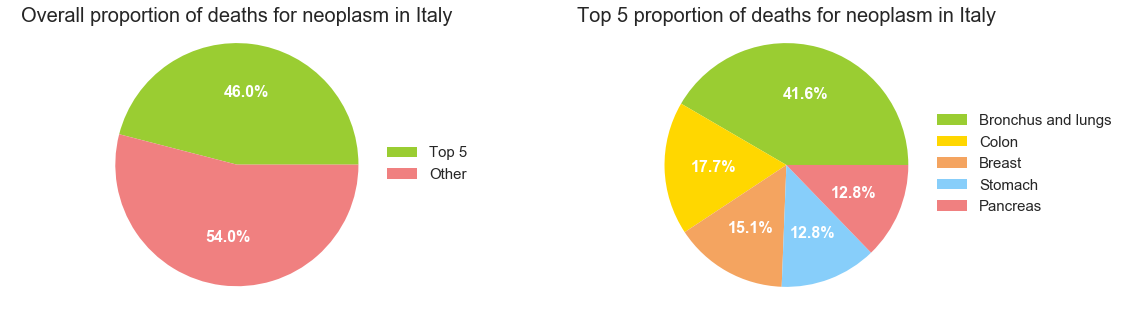

In [91]:
# Display pie chart to visualise the proportion of deaths
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,5))

colors1=['yellowgreen','lightcoral']
sizes1=no_deaths_neoplasm_it_total['proportion of deaths'].tolist()
labels1='Top 5','Other'
patches1, texts1, autotexts1=ax1.pie(sizes1, labels=labels1,colors=colors1, autopct='%1.1f%%', textprops=dict(color='w',weight='bold'))
ax1.axis('equal')
ax1.legend(loc='center left',bbox_to_anchor=(0.8, 0, 0, 1), prop={'size': 15})
ax1.set_title('Overall proportion of deaths for neoplasm in Italy', size=20)
plt.setp(autotexts1, size=16, weight="bold")

colors2=['yellowgreen', 'gold','sandybrown','lightskyblue', 'lightcoral']
sizes2=proportion_generic5.tolist()
labels2='Bronchus and lungs','Colon','Breast', 'Stomach', 'Pancreas'
patches2,texts2,autotexts2=ax2.pie(sizes2, labels=labels2,colors=colors2, autopct='%1.1f%%', textprops=dict(color='w')) # pie chart characteristics
ax2.axis('equal') # Equally sized circumference
ax2.legend(loc='center left',bbox_to_anchor=(0.8, 0, 0, 1), prop={'size': 15}) # legend location settings
ax2.set_title('Top 5 proportion of deaths for neoplasm in Italy', size=20)
plt.subplots_adjust(left=0.1, right=1.5)
plt.setp(autotexts2, size=16, weight="bold")
plt.show()

Top-5 neoplasms represent over 45% of the total neoplasm diagnoses in Italy. By far, the most common neoplasm amongst the top-5 is located in the bronchus and lungs. Notably, breast neoplasm has also a high prevalence, despite only affecting women. 

The age group distribution for deaths due to neoplasm in Australia was analysed in the code below.

In [92]:
# Elimination of the 'Cause' column as it is not of interest anymore (we are only interested in age groups)
aus_neoplasm=morticd10_country[(morticd10_country['Name']=='Australia')&(morticd10_country['Year']==2010)&(morticd10_country['Cause'].str.match('^C[0-9][0-9]|^D([0-3][0-9]|4[0-8])'))][morticd10_country.iloc[:,6:26].columns.tolist()]
no_deaths_neoplasm_aus=aus_neoplasm.sum()
no_deaths_neoplasm_aus_sorted=no_deaths_neoplasm_aus.sort_values(ascending=False)
no_deaths_neoplasm_aus_sorted5=no_deaths_neoplasm_aus_sorted.head(5) # Identification of top 5 age groups with Neoplasm as a cause of death

no_deaths_neoplasm_aus_sorted=pd.DataFrame(no_deaths_neoplasm_aus_sorted) # Convert to DataFrame for aesthetic purposes
no_deaths_neoplasm_aus_sorted.columns=['Number of deaths'] # Renaming of column
print('As shown in the following table, there are indeed differences by age group for deaths from Neoplasms in Australia in 2010.')
no_deaths_neoplasm_aus_sorted

As shown in the following table, there are indeed differences by age group for deaths from Neoplasms in Australia in 2010.


,Number of deaths
80-84 yrs,7167.0
75-79 yrs,6291.0
70-74 yrs,5713.0
85-89 yrs,5520.0
65-69 yrs,4768.0
60-64 yrs,3938.0
55-59 yrs,2695.0
90-94 yrs,2336.0
50-54 yrs,1756.0
45-49 yrs,1065.0


The top five groups in Australia dying with a Neoplasm as a cause of death is already displayed in the table above. It was considered that this would be clearer if displayed with a bar chart.

The top 5 age groups dying by Neoplasms in Australia in 2010 can be easily identified graphically, too.


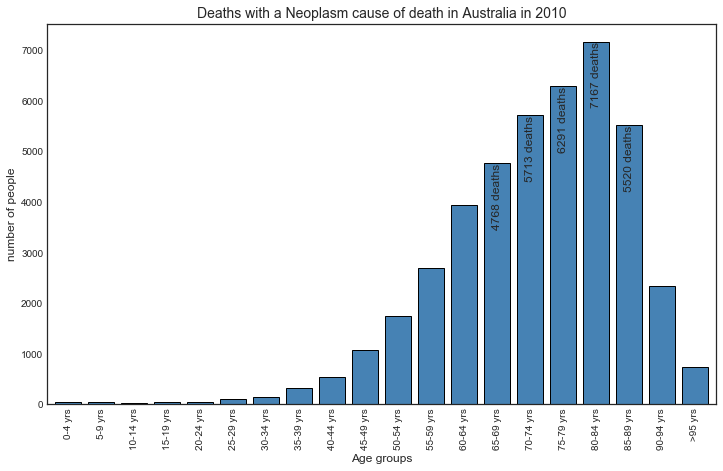

In [93]:
# Bar chart representation

plt.figure(figsize=(12,7))

# In here we specify the number of deaths for the top-5 columns
for i in range(len(no_deaths_neoplasm_aus)):
    if no_deaths_neoplasm_aus[i] in no_deaths_neoplasm_aus_sorted5.tolist():
        plt.text(i,no_deaths_neoplasm_aus[i],str(int(no_deaths_neoplasm_aus[i]))+' deaths',
                 horizontalalignment='center', verticalalignment='top', rotation='vertical', size=12)

#Plotting of the bar chart
no_deaths_neoplasm_aus.plot(kind='bar', color='steelblue', width=0.8, edgecolor='black') 
plt.title('Deaths with a Neoplasm cause of death in Australia in 2010', size=14)
plt.ylabel('number of people', size=12)
plt.xlabel('Age groups', size=12)
print('The top 5 age groups dying by Neoplasms in Australia in 2010 can be easily identified graphically, too.')
plt.show()

Having collated and analysed the data both for Australia and Italy with regard to neoplasm deaths, we calculated frequencies and compared the trends amongst these two countries. Even though both Italy and Australia are Western developed countries, they do differ economically and culturally. Hence, it has been deemed to be interesting to analyse potential contrasting trends which could perhaps give some hints on which country dealt with the neoplasm burden better in 2010.

In [94]:
# As done before, we create a new column grouping the age group comprised between 0 and 4 years old
pop_country['Pop 0-4 yrs']=np.sum(pop_country.iloc[:,5:10], axis=1)
cols=pop_country.columns.tolist()
cols=cols[0:10]+cols[-1:]+cols[10:32]
pop_country=pop_country[cols]
pop_country.columns

Index(['Country', 'Year', 'Sex', 'Frmat', 'Pop1', 'Pop2', 'Pop3', 'Pop4',
       'Pop5', 'Pop6', 'Pop 0-4 yrs', 'Pop7', 'Pop8', 'Pop9', 'Pop10', 'Pop11',
       'Pop12', 'Pop13', 'Pop14', 'Pop15', 'Pop16', 'Pop17', 'Pop18', 'Pop19',
       'Pop20', 'Pop21', 'Pop22', 'Pop23', 'Pop24', 'Pop25', 'Pop26', 'Lb',
       'name'],
      dtype='object')

Considering that sex and age could be potential confounders, most analysis have been carried out stratifying by the different categories of sex and age groups available.

In [95]:
# We define a function which allows us to identify total neoplasm deaths by sex
def neoplasm_sex(country):
    neoplasm_sex=morticd10_country[(morticd10_country['Name']==country)&(morticd10_country['Year']==2010)&(morticd10_country['Cause'].str.match('^C[0-9][0-9]|^D([0-3][0-9]|4[0-8])'))][morticd10_country.iloc[:,4:26].columns.tolist()].drop(columns='Cause')
    neoplasm_sex=neoplasm_sex.groupby('Sex').sum()
    return neoplasm_sex

In [96]:
aus_neoplasm_sex=neoplasm_sex('Australia')
aus_neoplasm_sex

,0-4 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-29 yrs,30-34 yrs,35-39 yrs,40-44 yrs,45-49 yrs,50-54 yrs,55-59 yrs,60-64 yrs,65-69 yrs,70-74 yrs,75-79 yrs,80-84 yrs,85-89 yrs,90-94 yrs,>95 yrs
Sex,,,,,,,,,,,,,,,,,,,,
1,18.0,28.0,20.0,26.0,24.0,50.0,79.0,139.0,247.0,535.0,919.0,1507.0,2267.0,2926.0,3473.0,3809.0,4161.0,2934.0,1104.0,287.0
2,18.0,18.0,11.0,24.0,28.0,47.0,59.0,184.0,301.0,530.0,837.0,1188.0,1671.0,1842.0,2240.0,2482.0,3006.0,2586.0,1232.0,448.0


In [97]:
it_neoplasm_sex=neoplasm_sex('Italy')
it_neoplasm_sex

,0-4 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-29 yrs,30-34 yrs,35-39 yrs,40-44 yrs,45-49 yrs,50-54 yrs,55-59 yrs,60-64 yrs,65-69 yrs,70-74 yrs,75-79 yrs,80-84 yrs,85-89 yrs,90-94 yrs,>95 yrs
Sex,,,,,,,,,,,,,,,,,,,,
1,40.0,44.0,43.0,72.0,100.0,131.0,218.0,421.0,829.0,1602.0,2904.0,4900.0,8656.0,11167.0,15935.0,18046.0,17809.0,11632.0,3284.0,1002.0
2,42.0,46.0,54.0,61.0,63.0,103.0,225.0,514.0,1096.0,1835.0,2781.0,3653.0,5393.0,6723.0,9323.0,11838.0,13700.0,12162.0,4557.0,2021.0


In [98]:
# This function allows us to calculate the population by sex and age group for 2010
def pop_sex(country):
    country_pop_country=pop_country[(pop_country['name']==country)&(pop_country['Year']==2010)].drop(columns=['Sex','Country','Year','Frmat','Pop1','Pop2','Pop3','Pop4','Pop5','Pop6','Pop26','Lb','name']).reset_index(0, drop=True)
    return country_pop_country

In [99]:
aus_pop_sex=pop_sex('Australia')
aus_pop_sex

,Pop 0-4 yrs,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25
0,743953.0,700989.0,719857.0,770176.0,848684.0,841085.0,765441.0,801732.0,769275.0,780643.0,725203.0,655174.0,603179.0,449449.0,343395.0,256917.0,188988.0,98056.0,31042.0,7006.0
1,706015.0,664365.0,683971.0,728073.0,793579.0,816353.0,763552.0,814291.0,780335.0,795215.0,742693.0,670031.0,608012.0,458728.0,366657.0,296145.0,250921.0,167271.0,68896.0,22168.0


In [100]:
it_pop_sex=pop_sex('Italy')
it_pop_sex

,Pop 0-4 yrs,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25
0,1462245.0,1458918.0,1447417.0,1519990.0,1596439.0,1757263.0,2082019.0,2411477.0,2477123.0,2340045.0,2010314.0,1807582.0,1814773.0,1468434.0,1400990.0,1078455.0,725761.0,371286.0,90114.0,29700.0
1,1383308.0,1379303.0,1364393.0,1431000.0,1530065.0,1730638.0,2050852.0,2388466.0,2472035.0,2377672.0,2084871.0,1908448.0,1942734.0,1639280.0,1667754.0,1453468.0,1186271.0,788191.0,247726.0,106576.0


In [101]:
# This function calculates the frequency of deaths caused by neoplasm for every 100,000 people
def freq_neoplasm_death(country):
    country_freq=np.divide(neoplasm_sex(country),pop_sex(country))*100000
    return country_freq

In [102]:
aus_freq=freq_neoplasm_death('Australia')
aus_freq

,0-4 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-29 yrs,30-34 yrs,35-39 yrs,40-44 yrs,45-49 yrs,50-54 yrs,55-59 yrs,60-64 yrs,65-69 yrs,70-74 yrs,75-79 yrs,80-84 yrs,85-89 yrs,90-94 yrs,>95 yrs
Sex,,,,,,,,,,,,,,,,,,,,
1,2.419508,3.994357,2.778330,3.375852,2.827908,5.944702,10.320848,17.337464,32.108154,68.533248,126.723138,230.015233,375.841997,651.019359,1011.371744,1482.579977,2201.727094,2992.167741,3556.471877,4096.488724
2,2.549521,2.709354,1.608255,3.296373,3.528319,5.757313,7.727044,22.596345,38.573177,66.648642,112.697979,177.305229,274.830102,401.545142,610.925197,838.102956,1197.986617,1545.994225,1788.202508,2020.931072


In [103]:
it_freq=freq_neoplasm_death('Italy')
it_freq

,0-4 yrs,5-9 yrs,10-14 yrs,15-19 yrs,20-24 yrs,25-29 yrs,30-34 yrs,35-39 yrs,40-44 yrs,45-49 yrs,50-54 yrs,55-59 yrs,60-64 yrs,65-69 yrs,70-74 yrs,75-79 yrs,80-84 yrs,85-89 yrs,90-94 yrs,>95 yrs
Sex,,,,,,,,,,,,,,,,,,,,
1,2.73552,3.015934,2.970809,4.736873,6.263941,7.454775,10.470606,17.458180,33.466243,68.460222,144.455045,271.080371,476.974255,760.469997,1137.409974,1673.319703,2453.838109,3132.894857,3644.272810,3373.737374
2,3.03620,3.335018,3.957804,4.262753,4.117472,5.951562,10.971050,21.520089,44.335942,77.176330,133.389548,191.412079,277.598477,410.119077,559.015298,814.465816,1154.879450,1543.027007,1839.532387,1896.299354


In [104]:
aus_it_freq=pd.DataFrame(columns=['median male','median female'],index=['Australia','Italy'])
aus_it_freq.index.names=['Death rate (x100,000)']
aus_it_freq.iloc[0,0]=np.round(aus_freq.iloc[0,:].quantile(.50),2)
aus_it_freq.iloc[0,1]=np.round(aus_freq.iloc[1,:].quantile(.50),2)
aus_it_freq.iloc[1,0]=np.round(it_freq.iloc[0,:].quantile(.50),2)
aus_it_freq.iloc[1,1]=np.round(it_freq.iloc[1,:].quantile(.50),2)

aus_it_freq

,median male,median female
"Death rate (x100,000)",,
Australia,97.63,89.67
Italy,106.46,105.28


Since the death rate distribution is not normal, the median death rate has been reported instead of a mean. The death rate tends to be higher in Italy than in Australia and amongst man over women. To further illustrate this, we have estimated the ratio of neoplasm death rates (per 100,000 people) in Italy vs. Australia for all age groups.

In [105]:
odds_m=np.divide(it_freq.iloc[0,:],aus_freq.iloc[0,:])
odds_f=np.divide(it_freq.iloc[1,:],aus_freq.iloc[1,:])

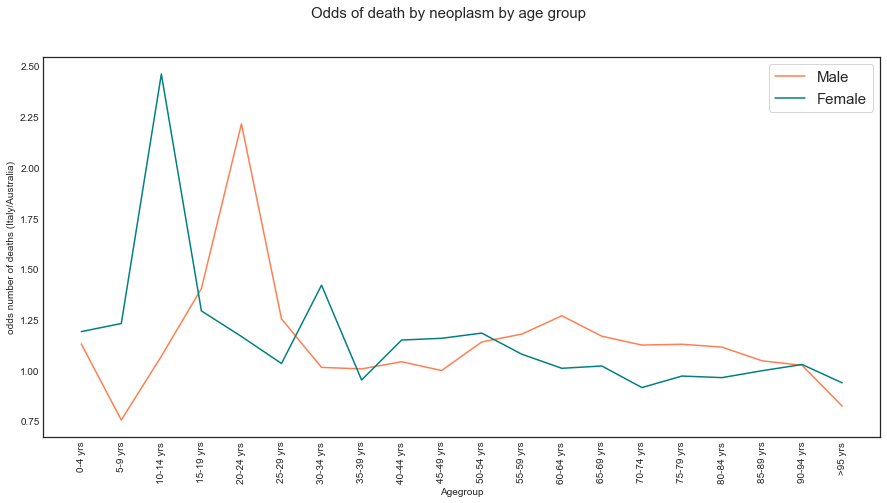

In [106]:
fig, ax=plt.subplots(figsize=(15,7))
ind=np.arange(len(odds_m))
              
ax.plot(ind,odds_m, color='coral')
ax.plot(ind,odds_f, color='teal')
ax.set(xticks=ind,xticklabels=odds_m.index)
ax.tick_params(axis='x', rotation=90)
ax.legend(['Male','Female'], frameon=True, prop={'size':15})
ax.set_ylabel('odds number of deaths (Italy/Australia)')
ax.set_xlabel('Agegroup')
fig.suptitle('Odds of death by neoplasm by age group', size=15)
plt.show()

The frequency of death in Italy is higher in low age groups for both sexes. However, this is not very significant demographically as the number of deaths amongst young people for neoplasm is not very high when compared to older age groups. Indeed, the frequency of deaths for people over 40 years old is quite similar in both countries and sexes. The next graphs make these claims clearer, as frequencies are displayed in bars and the absolute number of deaths can be traced with the overlaid linear plot.

In [107]:
def plot_death_ageg(country1,country2, sex):
    fig, ax1=plt.subplots(figsize=(10,5))
    ind=np.arange(len(freq_neoplasm_death(country1).columns))
    width=0.35
    ax2=ax1.twinx()
    
    if sex=='male':
        a=0
    if sex=='female':
        a=1
        
    p1=ax1.bar(ind, freq_neoplasm_death(country1).iloc[a,:], width, color='r')
    l1=ax2.plot(ind+(width/2),neoplasm_sex(country1).iloc[a,:], color='darkred')
    p2=ax1.bar(ind+width, freq_neoplasm_death(country2).iloc[a,:], width, color='y')
    l2=ax2.plot(ind+(width/2),neoplasm_sex(country2).iloc[a,:], color='olive')
    ax1.set(xticks=ind,xticklabels=freq_neoplasm_death(country1).columns)
    ax1.tick_params(axis='x', rotation=90)
    ax1.legend(['Death rate ' + str(country1),'Death rate ' + str(country2)], frameon=False, loc='upper left',
           prop={'size': 12})
    ax2.legend(['Absolute number of deaths ' + str(country1),'Absolute number of deaths ' + str(country2)], frameon=False, 
           bbox_to_anchor=(0, 0, 0, 0.85),loc='upper left',prop={'size': 12})
    ax1.set_ylabel('Death rate (x100,000)', size=14)
    ax2.set_ylabel('Absolute number of deaths', size=14)
    ax1.set_xlabel('Age group', size=14)
    fig.suptitle('Deaths by Neoplasm by age group in 2010 (' + str(sex)+ ')', size=16)
    plt.margins(0.03)
    plt.show()

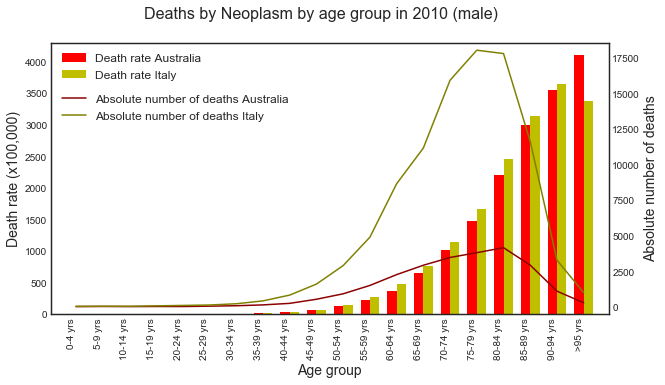

In [108]:
plot_death_ageg('Australia','Italy','male')

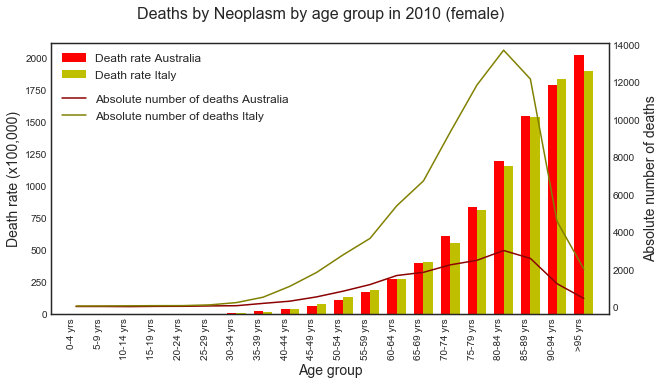

In [109]:
plot_death_ageg('Australia','Italy','female')

The absolute number of deaths in Italy is higher than in Australia, but this is due to the fact that Italy's population is 2.5-fold higher than Australia's. It is thus more informative to compare frequencies of neoplasm death by 100,000 people. An examination of these previous graphs further strengthens the conclusion that, generally, frequency of neoplasm death increases with age at similar rates regardless country (although frequencies are almost halved amongst females compared to males).

It is also relevant to assess the impact that different types of neoplasms might have in both countries. Thus, the top-5 most burdensome neoplasms for both countries are identified and plotted together in a bar chart.

In [110]:
# This function allows us to group by 'generic' causes of cancer by sex and country
def neoplasm_sex_type(country):
    neoplasm_type=morticd10_country[(morticd10_country['Name']==country)&(morticd10_country['Year']==2010)&(morticd10_country['Cause'].str.match('^C[0-9][0-9]|^D([0-3][0-9]|4[0-8])'))][morticd10_country.iloc[:,4:26].columns.tolist()]
    neoplasm_type['Cause']=neoplasm_type['Cause'].str[:3]
    neoplasm_sex_type=np.sum(neoplasm_type.groupby(['Cause','Sex']).sum(), axis=1) # Now we group by Cause and Sex
    neoplasm_sex_type=pd.DataFrame(neoplasm_sex_type, columns=['Number of deaths'])
    return neoplasm_sex_type

In [111]:
aus_neoplasm_sex_type=neoplasm_sex_type('Australia')
aus_neoplasm_sex_type.head()

Number of deaths
Cause Sex                  
C00   1                 4.0
      2                 7.0
C01   1                20.0
      2                 7.0
C02   1               124.0

In [112]:
# This is a function used for selecting the appropriate columns and rows in the multiindexed DataFrames
def country_sorted_sex(country,sex):
    idx=pd.IndexSlice # it helps us with slicing multiindexed DataFrames more easily
    
    if sex=='male':
        a=1
    if sex=='female':
        a=2
    
    country_sorted_s=neoplasm_sex_type(country).loc[idx[:,a],:].reset_index(level=1, drop=True).sort_values(by='Number of deaths', ascending=False)
    country_sorted_s.columns=['Number of deaths '+str(country)]
    
    return country_sorted_s

In [113]:
# Frequency calculation by type
def freq_neoplasm_type(country,sex):
    if sex=='male':
        a=0
    if sex=='female':
        a=1
    
    #Calling pop_sex, summing over the corresponding sex across all age groups
    frequency=np.divide(country_sorted_sex(country,sex),pop_sex(country).sum(axis=1)[a])*100000 
   
    freq_neoplasm_type=pd.DataFrame(frequency)
    freq_neoplasm_type.columns=['Frequency in '+str(country)]
    
    return freq_neoplasm_type

In [114]:
freq_neoplasm_type('Australia','female').sort_values(by=['Frequency in Australia'], ascending=False).head(5)

,Frequency in Australia
Cause,
C34,28.274747
C50,25.381184
C80,11.538526
C25,10.725828
C18,9.162947


In [115]:
freq_neoplasm_type('Italy','female').sort_values(by=['Frequency in Italy'], ascending=False).head(5)

,Frequency in Italy
Cause,
C50,38.913629
C34,26.544138
C18,21.925252
C25,17.438060
C16,13.670360


In [116]:
#Comparison of frequency of death by type of Neoplasm by males
aus_it_freq_m=pd.merge(freq_neoplasm_type('Australia','male'), freq_neoplasm_type('Italy','male'), how='left',left_on='Cause',right_on='Cause')
aus_it_freq_m.head()

,Frequency in Australia,Frequency in Italy
Cause,,
C34,44.431456,86.649748
C61,29.152512,25.577212
C80,13.432137,15.011749
C25,11.107864,17.318365
C18,10.107886,26.306335


In [117]:
#Comparison of frequency of death by type of Neoplasm by females
aus_it_freq_f=pd.merge(freq_neoplasm_type('Australia','female'), freq_neoplasm_type('Italy','female'), how='left',left_on='Cause',right_on='Cause')
aus_it_freq_f.head()

,Frequency in Australia,Frequency in Italy
Cause,,
C34,28.274747,26.544138
C50,25.381184,38.913629
C80,11.538526,11.659635
C25,10.725828,17.438060
C18,9.162947,21.925252


In [118]:
def country1_country2_sorted_sex(country1,country2,sex):
    #We construct a merged DataFrame with the absolute number of deaths by type of neoplasm
    c_sorted_s=pd.merge(country_sorted_sex(country1,sex), country_sorted_sex(country2,sex), how='outer', left_on='Cause', right_on='Cause')
    c_sorted_s.columns=['Deaths in '+str(country1),'Deaths in '+str(country2)]
    
    #We standardise the absolute deaths and sort by the sum of the standardised absolute deaths in both countries
    a=np.divide(c_sorted_s.iloc[:,0],c_sorted_s.iloc[:,0].max())
    b=np.divide(c_sorted_s.iloc[:,1],c_sorted_s.iloc[:,1].max())
    c_sorted_s['Sum']=a+b
    c_sorted_s.sort_values(['Sum'], inplace=True, ascending=False)
    c_sorted_s=c_sorted_s.drop(columns=['Sum'])
    
    #Determine number of columns to display for top5 of each country
    no_cols=len(pd.merge(country_sorted_sex(country1,sex).head(5),country_sorted_sex(country2,sex).head(5), how='outer', left_on='Cause',right_on='Cause'))
    c_freq_s=pd.merge(freq_neoplasm_type(country1,sex), freq_neoplasm_type(country2,sex), how='left',left_on='Cause',right_on='Cause')
    
    #Merge absolute deaths with frequencies
    c_sorted_s=pd.merge(c_sorted_s,c_freq_s, how='left',left_on='Cause',right_on='Cause')
    c_sorted_s.index.names=['Malignant Neoplasm']
    
    return c_sorted_s.head(no_cols)

In [119]:
aus_it_sorted_m=country1_country2_sorted_sex('Australia','Italy','male')
aus_it_sorted_m=aus_it_sorted_m.rename({'C34':'Bronchus and lung','C61':'Prostate','C18':'Colon','C80':'Without specification of site',
                        'C25':'Pancreas','C22':'Liver and intrahepatic bile ducts','C16':'Stomach'})
aus_it_sorted_m

,Deaths in Australia,Deaths in Italy,Frequency in Australia,Frequency in Italy
Malignant Neoplasm,,,,
Bronchus and lung,4932.0,25432.0,44.431456,86.649748
Prostate,3236.0,7507.0,29.152512,25.577212
Colon,1122.0,7721.0,10.107886,26.306335
Without specification of site,1491.0,4406.0,13.432137,15.011749
Pancreas,1233.0,5083.0,11.107864,17.318365
Liver and intrahepatic bile ducts,888.0,6057.0,7.999824,20.636895
Stomach,719.0,5819.0,6.477335,19.826002


In [120]:
aus_it_sorted_f=country1_country2_sorted_sex('Australia','Italy','female')
aus_it_sorted_f=aus_it_sorted_f.rename({'C34':'Bronchus and lung','C18':'Colon','C80':'Without specification of site',
                        'C25':'Pancreas','C56':'Ovary','C50':'Breast','C16':'Stomach'})
aus_it_sorted_f

,Deaths in Australia,Deaths in Italy,Frequency in Australia,Frequency in Italy
Malignant Neoplasm,,,,
Breast,2842.0,12115.0,25.381184,38.913629
Bronchus and lung,3166.0,8264.0,28.274747,26.544138
Colon,1026.0,6826.0,9.162947,21.925252
Pancreas,1201.0,5429.0,10.725828,17.438060
Without specification of site,1292.0,3630.0,11.538526,11.659635
Ovary,912.0,3193.0,8.144842,10.255982


In [121]:
def plot_neoplasm_bytype(country1,country2,sex):
    fig, ax=plt.subplots(figsize=(10,5))
    ccss=country1_country2_sorted_sex(country1,country2,sex) # We call a previously defined function
    ind=np.arange(len(ccss))
    width=0.35
    
    if sex=='male':
        labels=['Bronchus and lung','Prostate','Colon','Without specification of site','Pancreas',
                'Liver and intrahepatic bile ducts','Stomach']
    if sex=='female':
        labels=['Bronchus and lung','Colon','Without specification of site','Pancreas','Ovary','Breast','Stomach']
        
    p1=ax.bar(ind, ccss.iloc[:,2], width, color='r')
    p2=ax.bar(ind+width, ccss.iloc[:,3], width, color='y')
    ax.set(xticks=ind,xticklabels=labels)
    ax.tick_params(axis='x', rotation=90)
    ax.legend([str(country1),str(country2)], frameon=True, loc='upper right', prop={'size': 12})
    ax.grid()
    ax.set_ylabel('Death rate (x100,000)', size=14)
    ax.set_xlabel('Malignant Neoplasm', size=14)
    fig.suptitle('Deaths by Neoplasm by type in 2010 '+str(sex), size=16)
    plt.margins(0.03)
    plt.show()

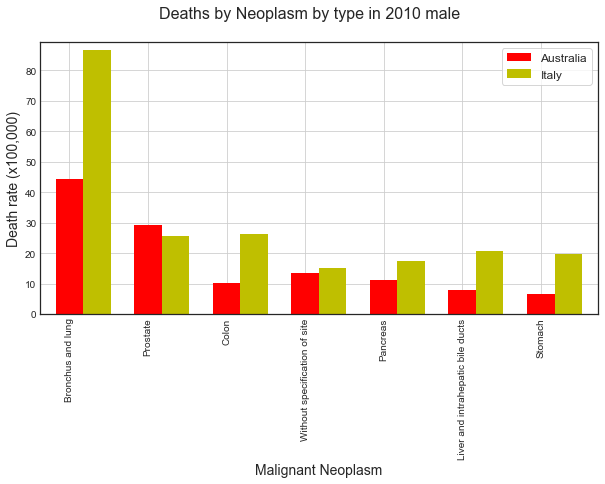

In [122]:
plot_neoplasm_bytype('Australia','Italy','male')

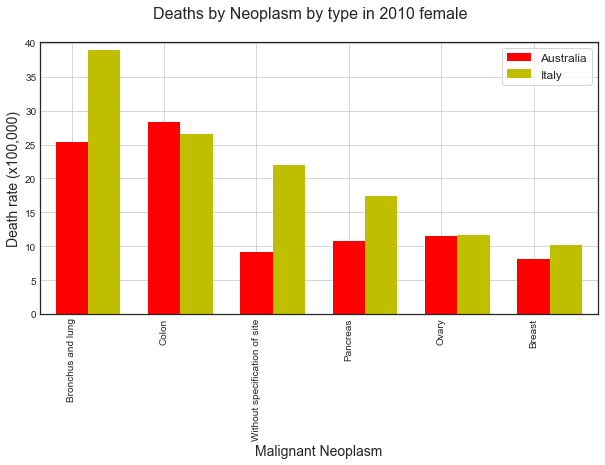

In [123]:
plot_neoplasm_bytype('Australia','Italy','female')

As already reported, 'Bronchus and lung' neoplasm are very prevalent in both countries, although the death rate is higher in Italy than in Australia for both sexes. However, these plots unveil something which had not been previously seen as clearly: sex-related neoplasms (i.e. prostate, ovary and breast) are common causes of death, as they figure in the top-5 of at least one of the countries of interest.

<h2><center>END OF THE REPORT</center></h2>

<h4><center>Word count: 2466 words</center></h4>

This report has been posted in Github (https://github.com/BVWC3/DMHR-Assignment)